[Source Code](https://jovian.com/aakashns/nyc-taxi-fare-prediction-blank) nyc-taxi-fare-prediction by aakashns

[Dataset Link](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) NYC taxi fare dataset

[Spreadsheet](https://docs.google.com/spreadsheets/d/11uAbDu8ECwiP3loYH6X-eUApnFBGVq2LkGdiouwhYrM/edit?usp=sharing) to keep track of experiments, feature engineering ideas and results

## **Outline**

>Write a summary for each section

>Write functional codes

*  **Outline** of the project:
  0. Download dataset
  0. Convert csv to parquet

* Work with sample
  2. Load dataset
  3. Explore & Analyze the dataset
  5. Data cleaning
  6. Visualization
  7. Prepare data for ML training
  8. Train dummy & baseline model
  9. Submit on Kaggle
  10. Feature engineering
  11. Explore & Analyze the dataset
  12. Visualization
  12. Prepare data for ML training
  13. Train & evaluate different models
  14. Tune hyperparameters
  15. Submit on Kaggle [Spreadsheet](https://docs.google.com/spreadsheets/d/11uAbDu8ECwiP3loYH6X-eUApnFBGVq2LkGdiouwhYrM/edit?usp=sharing)
  >Back to 9
  16. Train on whole data:
  
  >60% 80% ** => GPU => Import, Env(train_whole=True), 2, 9, 12, Train Functions, 14>Use on large samples (**Ignore all info, describe, head, etc**)
  
  >~100% => TPU => Import, Env(train_whole=True), Load Processed Data, Train Functions, Bayesian Optimization----------(**Failed**: Need GPU with more System RAM(16GB)~

  17. Document & Publish

## **Todos**

* **Read** about random seed & random state

* **Exercise**: Create graphs (histograms, line charts, bar charts, scatter plots, box plots, geo maps etc.) to study the distrubtion of values in each column, and the relationship of each input column to the target.



* **Exercise**: Ask & answer questions about the dataset:

  1. What is the busiest day of the week?
  2. What is the busiest time of the day?
  3. In which month are fares the highest?
  4. Which pickup locations have the highest fares?
  5. Which drop locations have the highest fares?
  6. What is the average ride distance?
  7. ...

* **Exercise**: In feature engineering, Observer the effect of adding each feature individually.

* Add **weather** conditions.

## **Infos**

### Dataset

**Predict a rider's taxi fare**

The evaluation metric for this competition is the root mean-squared error or **RMSE**

Features

* **pickup_datetime** - timestamp value indicating when the taxi ride started.
* **pickup_longitude** - float for longitude coordinate of where the taxi ride started.
* **pickup_latitude** - float for latitude coordinate of where the taxi ride started.
* **dropoff_longitude** - float for longitude coordinate of where the taxi ride ended.
* **dropoff_latitude** - float for latitude coordinate of where the taxi ride ended.
* **passenger_count** - integer indicating the number of passengers in the taxi ride.

Target

* **fare_amount** - float dollar amount of the cost of the taxi ride. This value is only in the training set


---


**Longitude** ranges between -180 and 180 degrees

**Latitude** goes for 0° at the equator to +90° N at the North Pole or -90° S at the South Pole

Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.


### Resources

**EDA + Asking questions** will help you develop a deeper understand of the data and give you ideas for feature engineering.

**Resources for exploratory analysis & visualization**:

* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* Data Analysis with Python: https://zerotopandas.com

## **Tips**

* EDA + asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.

* Take an iterative approach to build ML models: Do some EDA, Do some feature engineering, train a model then repeat to improve your model.

* Validation set should be as similar as possible to test set or real world data, The evaluation metric score of a model on validation & test sets should be very close, otherwise you're shooting in the dark.

* When working on Kaggle competition, submit early and submit often. The best wat to improve your models is to try & beat your previous score.

* Track your ideas & experiments systematically to avoid become overwhelmed with dozens of models.

* In feature engineering, we should observer the effect of adding each feature individually.

## **Imports** **

In [ ]:
%%capture
!pip install opendatasets xgboost

In [ ]:
import kagglehub

import random
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od

import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor, plot_importance, Booster

## **Env** **
60% and 100% => train_whole=True

In [ ]:
sample = True
random_seed = 42
train_whole = False

## ~**0.Download Dataset & 1.Convert csv to parquet**~

Steps:
* Download the whole dataset from Kaggle
* Explore dataset files

In [ ]:
# # Kaggle API key needed

# dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

# od.download(dataset_url)

### View Dataset Files

In [ ]:
# # List of files with size
# !ls -lh {data_dir}

"""
total 5.4G
-rw-r--r-- 1 root root  486 Jun  7 20:31 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jun  7 20:31 sample_submission.csv
-rw-r--r-- 1 root root 960K Jun  7 20:31 test.csv
-rw-r--r-- 1 root root 5.4G Jun  7 20:32 train.csv
"""

'\ntotal 5.4G\n-rw-r--r-- 1 root root  486 Jun  7 20:31 GCP-Coupons-Instructions.rtf\n-rw-r--r-- 1 root root 336K Jun  7 20:31 sample_submission.csv\n-rw-r--r-- 1 root root 960K Jun  7 20:31 test.csv\n-rw-r--r-- 1 root root 5.4G Jun  7 20:32 train.csv\n'

In [ ]:
# # Training set
# !head {data_dir}/train.csv

"""
key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
"""

'\nkey,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count\n2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1\n2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1\n2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2\n2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1\n2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1\n2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1\n2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1\n2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1\n2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.7

In [ ]:
# # Test set
# !head {data_dir}/test.csv

"""
key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
"""

'\nkey,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count\n2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1\n2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1\n2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1\n2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1\n2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1\n2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1\n2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1\n2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1\n2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 U

In [ ]:
# # Sample submission file
# !head {data_dir}/sample_submission.csv

"""
key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35
"""

'\nkey,fare_amount\n2015-01-27 13:08:24.0000002,11.35\n2015-01-27 13:08:24.0000003,11.35\n2011-10-08 11:53:44.0000002,11.35\n2012-12-01 21:12:12.0000002,11.35\n2012-12-01 21:12:12.0000003,11.35\n2012-12-01 21:12:12.0000005,11.35\n2011-10-06 12:10:20.0000001,11.35\n2011-10-06 12:10:20.0000003,11.35\n2011-10-06 12:10:20.0000002,11.35\n'

In [ ]:
# # No. of lines in training set
# !wc -l {data_dir}/train.csv

# # 55423856 ./new-york-city-taxi-fare-prediction/train.csv

In [ ]:
# # No. of lines in training set
# !wc -l {data_dir}/test.csv

# # 9914 ./new-york-city-taxi-fare-prediction/test.csv

In [ ]:
# # No. of lines in submission file
# !wc -l {data_dir}/sample_submission.csv

# # 9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv

Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 55 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.


### Convert csv to parquet

Steps:
* Load a fraction of train.csv
* Load the whole train.csv with TPU
* Save them as parquet in Google drive

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

    Ignore the key column(same as pickup_datetime)
    Parse pickup datetime while loading data
    Specify data types for other columns
        float32 for geo coordinates
        float32 for fare amount(maybe int16)
        uint8 for passenger count
    Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using pd.read_csv

In [ ]:
sample_frac = 0.01

data_dir = "./new-york-city-taxi-fare-prediction"

selected_cols = "fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count".split(",")
dtypes = {
    "fare_amount": "float32",
    "pickup_longitude": "float32",
    "pickup_latitude": "float32",
    "dropoff_longitude": "float32",
    "dropoff_latitude": "float32",
    "passenger_count": "int16"
}

#### Save & Load

If storage space is more important → use compression='gzip'

If speed is more important → use compression='snappy'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# %%time
# # randomly select columns
# def skip_row(row_idx):
#     if row_idx == 0:
#         return False
#     return random.random() > sample_frac

# random.seed(random_seed)
# df = pd.read_csv(data_dir + "/train.csv",
#                  usecols=selected_cols,
#                  dtype=dtypes,
#                  parse_dates=['pickup_datetime'],
#                  skiprows=skip_row)


# df.to_parquet(f"/content/drive/MyDrive/Datasets/NYC/nyc_{int(sample_frac * 100)}_train.parquet",
#               index=False,
#               compression='snappy'
# )

"""
4%
CPU times: user 1min 39s, sys: 3.18 s, total: 1min 42s
Wall time: 1min 48s

10%
CPU times: user 2min 56s, sys: 8.52 s, total: 3min 5s
Wall time: 3min 9s
"""

'\n4%\nCPU times: user 1min 39s, sys: 3.18 s, total: 1min 42s\nWall time: 1min 48s\n\n10%\nCPU times: user 2min 56s, sys: 8.52 s, total: 3min 5s\nWall time: 3min 9s\n'

In [ ]:
# # Read CSV with PyArrow backend for max performance (pandas 2.0+)
# df = pd.read_csv(
#     data_dir + "/train.csv",
#     usecols=selected_cols,
#     dtype=dtypes,
#     parse_dates=["pickup_datetime"],
#     engine="pyarrow",             # Highly optimized C++ backend
#     dtype_backend="pyarrow"       # Native Arrow types (faster memory access)
# )

# # Save with Row Group Size (for large files)
# # You can tune Parquet writing for better performance on big datasets
# df.to_parquet(
#     "/content/drive/MyDrive/Datasets/NYC/nyc_train_complete_tune.parquet",
#     index=False,
#     engine="pyarrow",
#     compression="snappy",
#     row_group_size=100_000      # Optional: makes downstream reads faster
# )

## ~20m

### Create a Sample

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import gdown

# url = 'https://drive.google.com/file/d/1gxf6ki7A5pAzQeB8WnuSXrBNVzDNUDNQ/view?usp=sharing'

# # Convert to the direct download link
# file_id = url.split('/d/')[1].split('/')[0]
# direct_url = f'https://drive.google.com/uc?id={file_id}'

# # Download
# gdown.download(direct_url, "train_complete.parquet", quiet=False)

In [ ]:
# df = pd.read_parquet("./train_complete.parquet").sample(frac=0.8, random_state=random_seed)

In [ ]:
# df.to_parquet(
#     "/content/drive/MyDrive/Datasets/NYC/nyc_80_train.parquet",
#     index=False,
#     engine="pyarrow",
#     compression="snappy",
#     row_group_size=100_000      # Optional: makes downstream reads faster
# )

## **2.Load Datasets** **

Steps
* Load train.parquet, test.csv, sample.csv
* Load NYC weather data

Train, Test & Sample

In [ ]:
import gdown

train_url = 'https://drive.google.com/file/d/1iulRTtZvalRXJA-CPAdnq_7Y3BqJrWHu/view?usp=sharing' # 2%
# train_url = 'https://drive.google.com/file/d/1Q6-UdGjTeAWJsv3ge0080nS2xwPNBlo1/view?usp=sharing' # 10%
# train_url = 'https://drive.google.com/file/d/1-eO3yV--1FfEYXrhVPTiqthqecKoKKMg/view?usp=sharing' # 30%

if train_whole:
  train_url = "https://drive.google.com/file/d/1i_gLr7lZ8x3gmsWVWwYfa15pxskaW6LH/view?usp=sharing" # 60%
  # train_url = "https://drive.google.com/file/d/1a3tE9RYmvxwdzW7wHg-zTu4keMeiG6Uf/view?usp=sharing" # 80%
  ##### train_url = "https://drive.google.com/file/d/1gxf6ki7A5pAzQeB8WnuSXrBNVzDNUDNQ/view?usp=sharing" # 100% Failed



urls = [
        (train_url, "train.parquet"),
        ('https://drive.google.com/file/d/1TO6W9Jc-wMJHf2_5w0PUqp4F89A_e020/view?usp=sharing', 'test.csv'),
        ('https://drive.google.com/file/d/16Nad39Vn0bHwTmS2x3p3FVZdrIshUS8r/view?usp=sharing', 'sample.csv')
        ]

for url, name in urls:
    # Convert to the direct download link
    file_id = url.split('/d/')[1].split('/')[0]
    direct_url = f'https://drive.google.com/uc?id={file_id}'

    # Download
    gdown.download(direct_url, name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1iulRTtZvalRXJA-CPAdnq_7Y3BqJrWHu
To: /content/train.parquet
100%|██████████| 26.7M/26.7M [00:00<00:00, 72.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TO6W9Jc-wMJHf2_5w0PUqp4F89A_e020
To: /content/test.csv
100%|██████████| 983k/983k [00:00<00:00, 56.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=16Nad39Vn0bHwTmS2x3p3FVZdrIshUS8r
To: /content/sample.csv
100%|██████████| 343k/343k [00:00<00:00, 20.5MB/s]


In [ ]:
%%time
train_taxi_data = pd.read_parquet("./train.parquet")
test_taxi_data = pd.read_csv("./test.csv", parse_dates=['pickup_datetime'])
sample_taxi_data = pd.read_csv("./sample.csv")
"""
nyc_train_complete_tune.parquet 1.15GB
CPU times: user 4.84 s, sys: 8.82 s, total: 13.7 s
Wall time: 8.66 s
"""

CPU times: user 428 ms, sys: 326 ms, total: 754 ms
Wall time: 1.29 s


'\nnyc_train_complete_tune.parquet 1.15GB\nCPU times: user 4.84 s, sys: 8.82 s, total: 13.7 s\nWall time: 8.66 s\n'

In [ ]:
train_taxi_data.shape

(1081167, 7)

In [ ]:
test_taxi_data.shape # Contain Key column

(9914, 7)

In [ ]:
sample_taxi_data.shape

(9914, 2)

## **3.Explore & Analyze the dataset**

### Train

In [ ]:
train_taxi_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06
mean,11.3116,-73.9751,40.751,-73.9743,40.7514,1.69405
std,9.50578,0.90563,0.416839,0.907812,0.417298,1.30963
min,0.01,-74.9215,40.0333,-74.9264,40.0566,1
25%,6,-73.9923,40.7365,-73.9916,40.7356,1
50%,8.5,-73.9821,40.7534,-73.9806,40.7538,1
75%,12.5,-73.9683,40.7675,-73.9653,40.7684,2
max,149.79,-72.0632,41.8537,-72.0773,41.6807,6


* Negetive fare amount
* 93963.4 fare amount!
* longitude & latitude out of range
* 208 passengers!

In [ ]:
train_taxi_data["pickup_datetime"].describe()

,pickup_datetime
count,1081167
mean,2012-03-20 20:50:36.829993984+00:00
min,2009-01-01 00:09:21+00:00
25%,2010-08-15 00:58:30+00:00
50%,2012-03-22 09:37:20+00:00
75%,2013-10-20 18:17:30+00:00
max,2015-06-30 23:59:48+00:00


In [ ]:
train_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081167 entries, 7389741 to 12723910
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   fare_amount        1081167 non-null  float32            
 1   pickup_datetime    1081167 non-null  datetime64[ns, UTC]
 2   pickup_longitude   1081167 non-null  float32            
 3   pickup_latitude    1081167 non-null  float32            
 4   dropoff_longitude  1081167 non-null  float32            
 5   dropoff_latitude   1081167 non-null  float32            
 6   passenger_count    1081167 non-null  int16              
dtypes: datetime64[ns, UTC](1), float32(5), int16(1)
memory usage: 39.2 MB


In [ ]:
train_taxi_data.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


drop off longitude & latitude contain 367 nan values

In [ ]:
train_taxi_data["passenger_count"].unique()

array([1, 2, 5, 3, 4, 6], dtype=int16)

0 passanger == 0 fare amount?

In [ ]:
train_taxi_data[train_taxi_data["passenger_count"] == 0]["fare_amount"].describe()

,fare_amount
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


### Test

In [ ]:
test_taxi_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


There is no 0 passengers in test taxi data

In [ ]:
test_taxi_data.isna().sum()

,0
key,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
test_taxi_data["pickup_datetime"].describe()

,pickup_datetime
count,9914
mean,2012-05-06 09:24:04.549122560+00:00
min,2009-01-01 11:04:24+00:00
25%,2010-11-17 19:10:23+00:00
50%,2012-01-26 07:33:00+00:00
75%,2014-01-11 17:47:47+00:00
max,2015-06-30 20:03:50+00:00


test datetime is scattered 2009-2015

### Summary
Based on whole train data

Train set:
* **Negetive** fare amount (Wrong Data)
* 93963.4 fare amount!
* **longitude** & **latitude** out of range(Wrong Data)
* 208 passengers!
* **0 passangers** with **non zero fare amount** (Wrong Data)
* drop off longitude & latitude contain 367 nan values
* The dataset takes up ~39 MB of space in the RAM(sample)
* The dataset takes up ~2 GB of space in the RAM

Test set:
* **9914 rows** of data
* **No** missing values
* No obvious data entry errors
* There is no 0 passengers in test taxi data (Drop 0 passenger in train set)
* 1 to 6 passengers (we can limit training data to this range)
* Longitudes lie between **-75 and -72**
* Latitudes lie between **40 and 42**
* Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

Conclusion:
* Filter negetive fare amount
* Filter wrong **longitude** & **latitude**
* Passengers range **[1, 6]** and exclude others
* We can use the ranges of the test set to drop outliers/invalid data from the training set.

## **4.Data Cleaning**

Based on whole train data

* Drop Nans
* Filter negetive fare amount
* Filter wrong longitude & latitude **[-180, 180] [-90, 90]** or **[-75, -72]  [40, 42]**
* Passengers range [1, 6] and exclude others
* Select a sample of train set


In [ ]:
train_taxi_data.shape

(1081167, 7)

In [ ]:
train_taxi_data.dropna(inplace=True)

In [ ]:
train_taxi_data = train_taxi_data[(train_taxi_data["passenger_count"] < 7) &
                                  (train_taxi_data["passenger_count"] != 0) &

                                  (train_taxi_data["fare_amount"] > 0) &
                                  (train_taxi_data["fare_amount"] < 500) &

                                  (train_taxi_data["pickup_longitude"] >= -75) &
                                  (train_taxi_data["pickup_longitude"] <= -72) &

                                  (train_taxi_data["pickup_latitude"] >= 40) &
                                  (train_taxi_data["pickup_latitude"] <= 42) &

                                  (train_taxi_data["dropoff_longitude"] >= -75) &
                                  (train_taxi_data["dropoff_longitude"] <= -72) &

                                  (train_taxi_data["dropoff_latitude"] >= 40) &
                                  (train_taxi_data["dropoff_latitude"] <= 42)
                                  ]

In [ ]:
train_taxi_data.shape

(1081167, 7)

About 1,350,000 rows are excluded from 55M rows

Based on test set range

In [ ]:
train_taxi_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06
mean,11.3116,-73.9751,40.751,-73.9743,40.7514,1.69405
std,9.50578,0.90563,0.416839,0.907812,0.417298,1.30963
min,0.01,-74.9215,40.0333,-74.9264,40.0566,1
25%,6,-73.9923,40.7365,-73.9916,40.7356,1
50%,8.5,-73.9821,40.7534,-73.9806,40.7538,1
75%,12.5,-73.9683,40.7675,-73.9653,40.7684,2
max,149.79,-72.0632,41.8537,-72.0773,41.6807,6


In [ ]:
test_taxi_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914,9914,9914,9914,9914
mean,-73.9747,40.751,-73.9737,40.7517,1.67127
std,0.042774,0.0335415,0.0390718,0.0354352,1.27875
min,-74.2522,40.5731,-74.2632,40.569,1
25%,-73.9925,40.7361,-73.9912,40.7353,1
50%,-73.9823,40.7531,-73.98,40.7541,1
75%,-73.968,40.7671,-73.9641,40.7688,2
max,-72.9865,41.7096,-72.991,41.6967,6


In [ ]:
train_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081167 entries, 7389741 to 12723910
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   fare_amount        1081167 non-null  float32            
 1   pickup_datetime    1081167 non-null  datetime64[ns, UTC]
 2   pickup_longitude   1081167 non-null  float32            
 3   pickup_latitude    1081167 non-null  float32            
 4   dropoff_longitude  1081167 non-null  float32            
 5   dropoff_latitude   1081167 non-null  float32            
 6   passenger_count    1081167 non-null  int16              
dtypes: datetime64[ns, UTC](1), float32(5), int16(1)
memory usage: 39.2 MB


In [ ]:
train_taxi_data.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


## **5.Visualization**

### Correlation

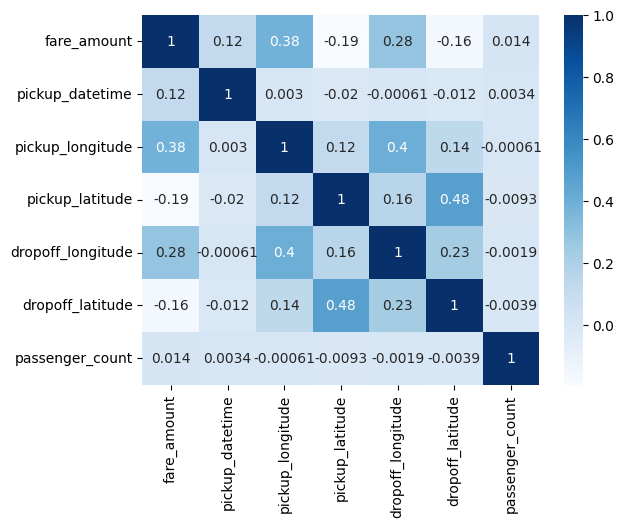

In [ ]:
if sample:
    sns.heatmap(data=train_taxi_data.corr(), annot=True, cmap="Blues")
    plt.show()

### BoxPlot

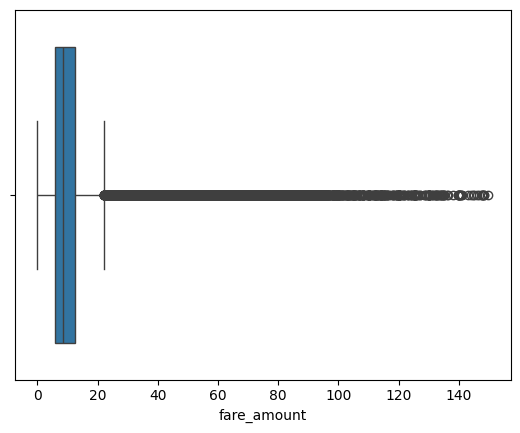

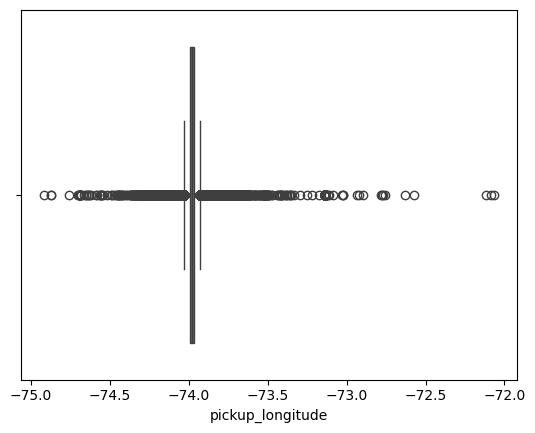

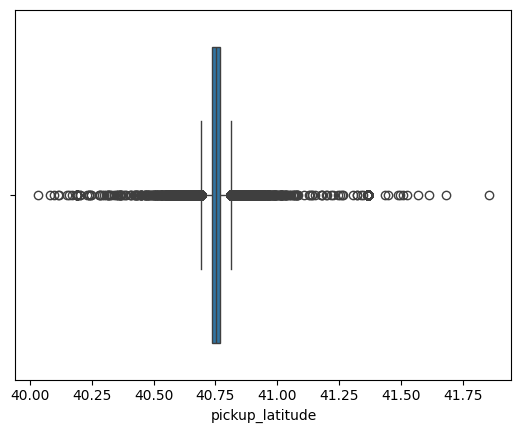

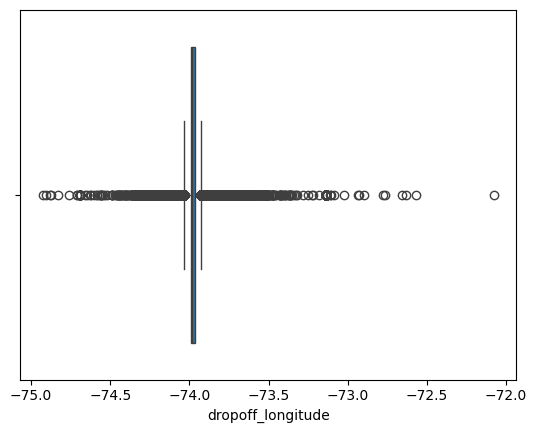

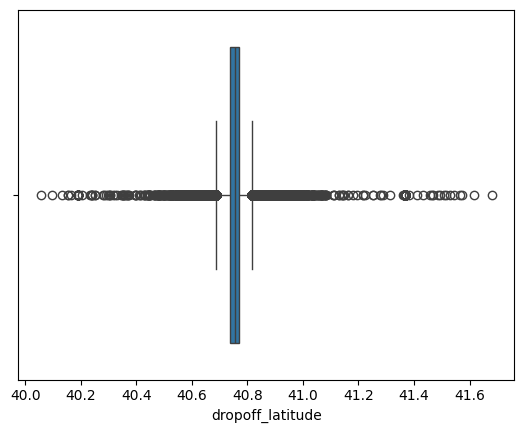

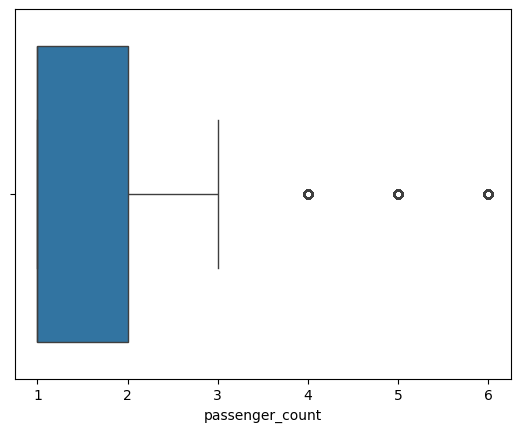

In [ ]:
if sample:
    cols = list(train_taxi_data.columns)
    cols.remove("pickup_datetime")
    for col in cols:
      sns.boxplot(data=train_taxi_data, x=col)
      plt.show()

I can't drop these outliers samples because they are in test set

only outliers in fare_amount can be dropped

### Histogram

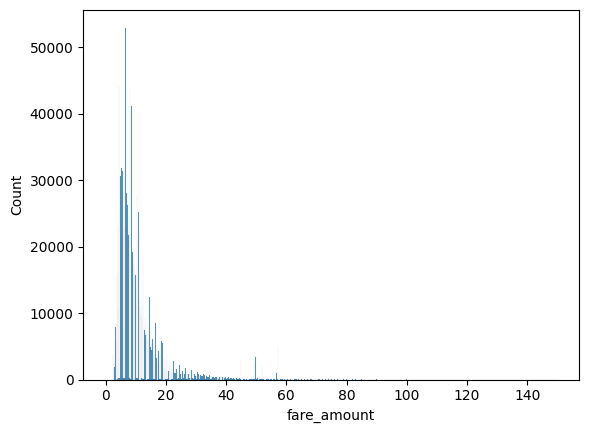

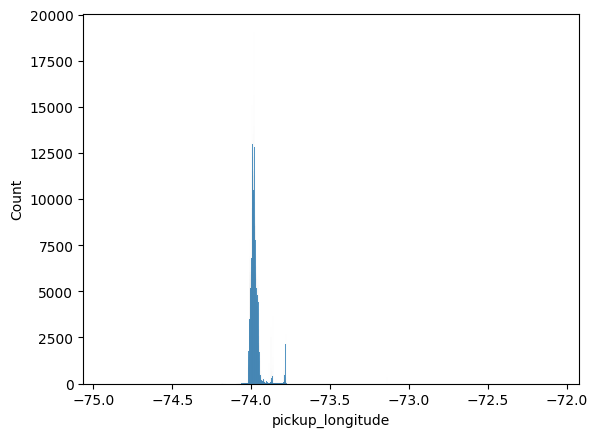

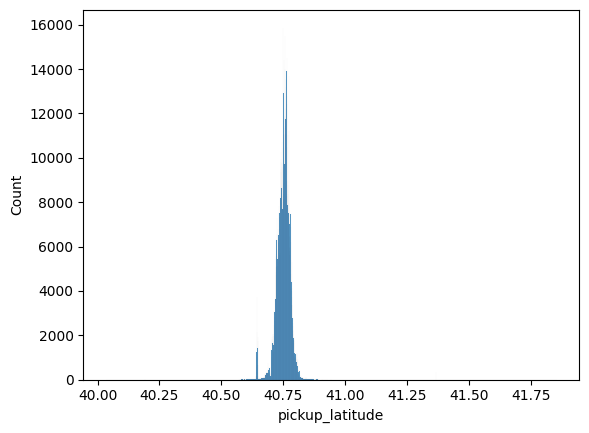

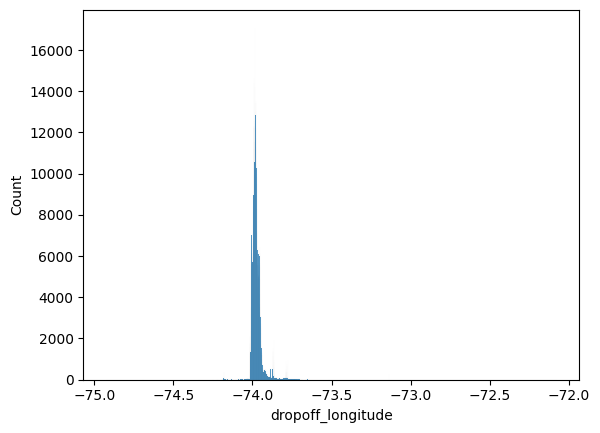

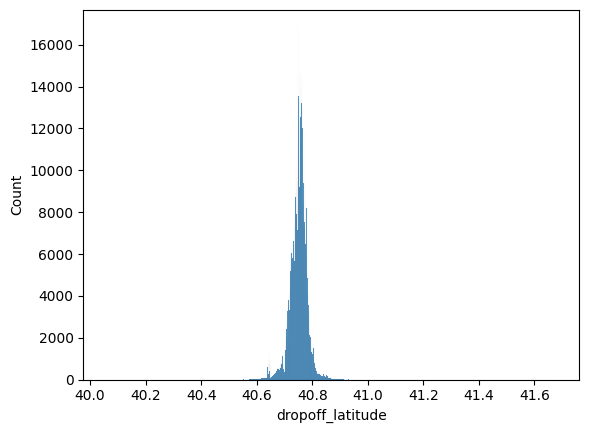

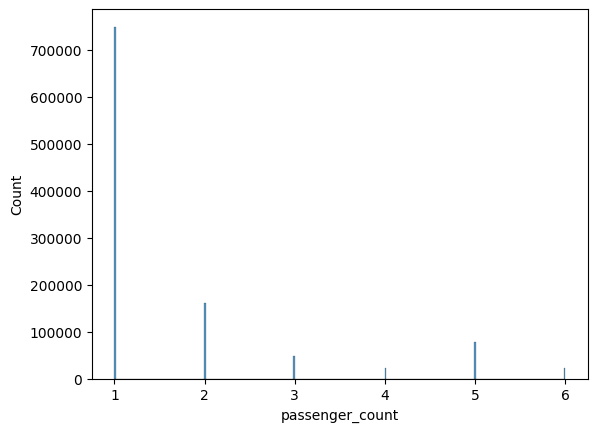

In [ ]:
if sample:
    cols = list(train_taxi_data.columns)
    cols.remove("pickup_datetime")
    for col in cols:
      sns.histplot(data=train_taxi_data, x=col)
      plt.show()

## **6.Prepare Dataset for Training**


* [Clean data](#scrollTo=4_Data_Cleaning)
* Split Training & Validation Set
* Extract Inputs & Outputs
      Training
      Validation
      Test

### Input & Output columns

In [ ]:
train_taxi_data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
target_cols = ['fare_amount']
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
scalar_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_taxi_data[input_cols],
                                                  train_taxi_data[target_cols],
                                                  test_size=0.2,
                                                  random_state=random_seed)

X_test = test_taxi_data.copy()

In [ ]:
X_train.shape, y_train.shape

((864933, 5), (864933, 1))

In [ ]:
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

### Normalization

In [ ]:
scalar = MinMaxScaler()

scalar.fit(X_train[scalar_cols]) # exclude pickup_datetime

MinMaxScaler()

In [ ]:
X_train[scalar_cols] = scalar.transform(X_train[scalar_cols])
X_val[scalar_cols] = scalar.transform(X_val[scalar_cols])
X_test[scalar_cols] = scalar.transform(X_test[scalar_cols])

In [ ]:
X_val.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,216234.000000,216234.000000,216234.000000,216234.000000,216234.000000
mean,0.331088,0.394293,0.334179,0.427932,0.138643
std,0.013459,0.016296,0.013195,0.020314,0.262016
min,0.081051,0.045444,0.018553,0.045639,0.000000
25%,0.325109,0.386297,0.328150,0.418265,0.000000
50%,0.328665,0.395618,0.332001,0.429386,0.000000
75%,0.333517,0.403339,0.337364,0.438301,0.200000
max,0.624186,0.818178,0.627932,0.916750,1.000000


## **Train Functions**

In [ ]:
def try_model(model):
    # Fit the model
    model.fit(X_train, y_train.iloc[:, 0])

    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Compute RMSE
    train_rmse = root_mean_squared_error(y_train.iloc[:, 0], train_preds)
    val_rmse = root_mean_squared_error(y_val.iloc[:, 0], val_preds)

    # Compute MAE
    train_mae = mean_absolute_error(y_train.iloc[:, 0], train_preds)
    val_mae = mean_absolute_error(y_val.iloc[:, 0], val_preds)

    print(f"Model Parameters: {[(key, value) for key, value in model.get_params().items() if value]}")
    print("RMSE train, val:", train_rmse, val_rmse)
    print("MAE train, val:", train_mae, val_mae)

## **7.Train Hardcoded & Baseline Models**



- Hardcoded model: always predict average fare
- Baseline model: Linear regression

For evaluation the dataset uses RMSE error:
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

In [ ]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(shape=inputs.shape[0], fill_value=self.mean)

In [ ]:
# %%time
# dummy = DummyRegressor(strategy="mean")
# try_model(dummy)

"""
Model Parameters: [('strategy', 'mean')]
RMSE train, val: 9.51318645477295 9.476973533630371
MAE train, val: 5.98550271987915 5.965828895568848
CPU times: user 16.4 ms, sys: 0 ns, total: 16.4 ms
Wall time: 16.4 ms
"""

"\nModel Parameters: [('strategy', 'mean')]\nRMSE train, val: 9.51318645477295 9.476973533630371\nMAE train, val: 5.98550271987915 5.965828895568848\nCPU times: user 16.4 ms, sys: 0 ns, total: 16.4 ms\nWall time: 16.4 ms\n"

In [ ]:
# %%time
# lr_model = LinearRegression()
# try_model(lr_model)

"""
Model Parameters: [('copy_X', True), ('fit_intercept', True)]
RMSE train, val: 9.512218475341797 9.476325035095215
MAE train, val: 5.9852190017700195 5.965312957763672
CPU times: user 179 ms, sys: 15 ms, total: 194 ms
Wall time: 200 ms
"""

"\nModel Parameters: [('copy_X', True), ('fit_intercept', True)]\nRMSE train, val: 9.512218475341797 9.476325035095215\nMAE train, val: 5.9852190017700195 5.965312957763672\nCPU times: user 179 ms, sys: 15 ms, total: 194 ms\nWall time: 200 ms\n"

The linear regression model is off by 6$, which isn't much better than simply predicting the average.

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

## **Predict Test & 8.Submit on Kaggle**

In [ ]:
def predict_test(model):
    test_pred = model.predict(X_test[input_cols])

    submission_df = X_test[["key"]].copy()

    submission_df["fare_amount"] = test_pred

    submission_df.to_csv("submission.csv", index=None)

In [ ]:
# predict_test(xgb_model)

"""
lr Score: 9.40712
"""

'\nlr Score: 9.40712\n'

---

---


## **9.Feature Engineering** **

- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add drivable distance between pickup & drop
- Add distance from landmarks
- Add Weather conditions

You should observer the effect of adding each feature individually.

### Date

In [ ]:
def split_date_time(df, col):
    df[col + "_Year"] = df[col].dt.year.astype(np.int16)
    df[col + "_Month"] = df[col].dt.month.astype(np.int8)
    df[col + "_Day"] = df[col].dt.day.astype(np.int8)
    df[col + "_DayOfWeek"] = df[col].dt.weekday.astype(np.int8)
    df[col + "_Hour"] = df[col].dt.hour.astype(np.int8)
    df[col + "_Minute"] = df[col].dt.minute.astype(np.int8)
    # round minutes
    # df["pickup_datetime"] = df["pickup_datetime"].dt.round('h')

In [ ]:
split_date_time(train_taxi_data, "pickup_datetime")
split_date_time(test_taxi_data, "pickup_datetime")

In [ ]:
train_taxi_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_Year,pickup_datetime_Month,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute
7389741,13.700000,2011-02-28 02:07:00+00:00,-73.990234,40.756474,-73.932968,40.794975,1,2011,2,28,0,2,7
492257,25.700001,2010-09-01 23:16:47+00:00,-74.001213,40.736572,-73.983307,40.738510,1,2010,9,1,2,23,16
15132111,12.000000,2013-05-15 09:33:36+00:00,-73.981865,40.767841,-73.988274,40.740799,1,2013,5,15,2,9,33
38813193,8.500000,2012-12-21 23:08:02+00:00,-74.005882,40.736156,-73.991257,40.723873,2,2012,12,21,4,23,8
5606958,10.500000,2011-06-10 12:10:20+00:00,-73.975975,40.791550,-73.976364,40.760666,1,2011,6,10,4,12,10


### Drop Date

In [ ]:
if train_whole:
  del train_taxi_data["pickup_datetime"]
  del test_taxi_data["pickup_datetime"]
  gc.collect()

### Distance

* https://en.wikipedia.org/wiki/Haversine_formula
* https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas


In [ ]:
def haversine_vectorized(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of Earth in kilometers

    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

In [ ]:
train_taxi_data["distance_km"] = haversine_vectorized(train_taxi_data.pickup_longitude,
                                                      train_taxi_data.pickup_latitude,
                                                      train_taxi_data.dropoff_longitude,
                                                      train_taxi_data.dropoff_latitude).astype(np.float32)

test_taxi_data["distance_km"] = haversine_vectorized(test_taxi_data.pickup_longitude,
                                                      test_taxi_data.pickup_latitude,
                                                      test_taxi_data.dropoff_longitude,
                                                      test_taxi_data.dropoff_latitude).astype(np.float32)

In [ ]:
train_taxi_data.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_Year,pickup_datetime_Month,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute,distance_km
7389741,13.700000,2011-02-28 02:07:00+00:00,-73.990234,40.756474,-73.932968,40.794975,1,2011,2,28,0,2,7,6.448661
492257,25.700001,2010-09-01 23:16:47+00:00,-74.001213,40.736572,-73.983307,40.738510,1,2010,9,1,2,23,16,1.524154


In [ ]:
train_taxi_data.distance_km.describe()

,distance_km
count,1.081167e+06
mean,3.331256e+00
std,3.786806e+00
min,0.000000e+00
25%,1.253874e+00
50%,2.152913e+00
75%,3.907465e+00
max,1.616861e+02


In [ ]:
test_taxi_data.distance_km.describe()

,distance_km
count,9914.000000
mean,3.435371
std,3.972377
min,0.000000
25%,1.298277
50%,2.217412
75%,4.045302
max,99.996040


We can drop samples where distance_km >= 100km

Zero Distance? (In train & test sets)

In [ ]:
train_taxi_data[train_taxi_data.distance_km == 0.0]["fare_amount"].describe()

,fare_amount
count,11657.000000
mean,10.977362
std,13.474263
min,0.010000
25%,4.900000
50%,6.900000
75%,10.500000
max,140.000000


In [ ]:
len(train_taxi_data[train_taxi_data.distance_km == 0.0])

11657

### Add Distance From Popular Landmarks


- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location.

In [ ]:
landmarks_lonlat = [
                    ((-73.7781, 40.6413), "jfk"),
                    ((-73.8740, 40.7769), "lga"),
                    ((-74.1745, 40.6895), "ewr"),
                    ((-73.9632, 40.7794), "met"),
                    ((-74.0099, 40.7126), "wtc"),
                    ]

In [ ]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat, col):
    lon, lat = landmark_lonlat
    df[f"{col}_distance_to_" + landmark_name] = haversine_vectorized(lon, lat, df[f"{col}_longitude"], df[f"{col}_latitude"]).astype(np.float32)

In [ ]:
# Landmarks distance to dropoff
%%time
for lonlat , name in landmarks_lonlat:
    add_landmark_dropoff_distance(train_taxi_data, name, lonlat, "dropoff")
    add_landmark_dropoff_distance(test_taxi_data, name, lonlat, "dropoff")

CPU times: user 935 ms, sys: 9.81 ms, total: 945 ms
Wall time: 621 ms


In [ ]:
# Landmarks distance to pickup
%%time
for lonlat, name in landmarks_lonlat:
    add_landmark_dropoff_distance(train_taxi_data, name, lonlat, "pickup")
    add_landmark_dropoff_distance(test_taxi_data, name, lonlat, "pickup")

CPU times: user 926 ms, sys: 57.8 ms, total: 983 ms
Wall time: 661 ms


In [ ]:
train_taxi_data.sample(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_Year,pickup_datetime_Month,pickup_datetime_Day,...,dropoff_distance_to_jfk,dropoff_distance_to_lga,dropoff_distance_to_ewr,dropoff_distance_to_met,dropoff_distance_to_wtc,pickup_distance_to_jfk,pickup_distance_to_lga,pickup_distance_to_ewr,pickup_distance_to_met,pickup_distance_to_wtc
39398536,7.5,2015-04-09 18:37:12+00:00,-73.974419,40.783276,-73.984848,40.766735,1,2015,4,9,...,22.322046,9.402671,18.142492,2.303539,6.37888,22.869602,8.484818,19.822031,1.038188,8.407887
10098237,30.5,2011-02-27 20:25:00+00:00,-73.870918,40.773769,-74.015976,40.707123,2,2011,2,27,...,21.354090,14.257114,13.507124,9.184757,0.79571,16.678980,0.433973,27.242067,7.795441,13.540794


In [ ]:
all(train_taxi_data.columns[1:] == test_taxi_data.columns[1:])

True

test first column is key and train first column is fare_amount

### Remove Outliers and Invalid Data

Done on [Data Cleaning](#scrollTo=4_Data_Cleaning)

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [ ]:
train_taxi_data.dropna(inplace=True)

We'll use the following ranges:

    fare_amount: $0 to $500 (1-500)
    longitudes: -75 to -72
    latitudes: 40 to 42
    passenger_count: 1 to 6


In [ ]:
def remove_outliers(df):
    return df[(df["passenger_count"] < 7) &
              (df["passenger_count"] != 0) &

              (df["fare_amount"] > 0) &
              (df["fare_amount"] < 500) &

              (df["pickup_longitude"] >= -75) &
              (df["pickup_longitude"] <= -72) &

              (df["pickup_latitude"] >= 40) &
              (df["pickup_latitude"] <= 42) &

              (df["dropoff_longitude"] >= -75) &
              (df["dropoff_longitude"] <= -72) &

              (df["dropoff_latitude"] >= 40) &
              (df["dropoff_latitude"] <= 42)
              ]

In [ ]:
train_taxi_data = remove_outliers(train_taxi_data)

### Drop longitude and latitude

In [ ]:
if train_whole:
  del train_taxi_data["pickup_longitude"]
  del train_taxi_data["dropoff_longitude"]
  del train_taxi_data["pickup_latitude"]
  del train_taxi_data["dropoff_latitude"]
  gc.collect()

### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.

You may also want to create differnt notebooks for EDA, feature engineering and model training.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
if not train_whole:
    train_taxi_data.to_parquet("train_taxi_data.parquet")
    test_taxi_data.to_parquet("test_taxi_data.parquet")

## **10.Explore & Analyze the dataset**

### Train

In [ ]:
train_taxi_data.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
pickup_datetime_Year,0
pickup_datetime_Month,0
pickup_datetime_Day,0


In [ ]:
train_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081167 entries, 7389741 to 12723910
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype              
---  ------                     --------------    -----              
 0   fare_amount                1081167 non-null  float32            
 1   pickup_datetime            1081167 non-null  datetime64[ns, UTC]
 2   pickup_longitude           1081167 non-null  float32            
 3   pickup_latitude            1081167 non-null  float32            
 4   dropoff_longitude          1081167 non-null  float32            
 5   dropoff_latitude           1081167 non-null  float32            
 6   passenger_count            1081167 non-null  int16              
 7   pickup_datetime_Year       1081167 non-null  int16              
 8   pickup_datetime_Month      1081167 non-null  int8               
 9   pickup_datetime_Day        1081167 non-null  int8               
 10  pickup_datetime_DayOfWeek  1081167 non-n

In [ ]:
train_taxi_data.iloc[:, 9:].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute,distance_km,dropoff_distance_to_jfk,dropoff_distance_to_lga,dropoff_distance_to_ewr,dropoff_distance_to_met,dropoff_distance_to_wtc,pickup_distance_to_jfk,pickup_distance_to_lga,pickup_distance_to_ewr,pickup_distance_to_met,pickup_distance_to_wtc
count,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06,1.08117e+06
mean,15.7084,3.04453,13.5009,29.5616,3.33126,20.9206,9.68839,18.4855,4.48392,5.96574,20.8687,9.67614,18.3571,4.33038,5.74089
std,8.68735,1.94946,6.51705,17.3268,3.78681,3.07925,3.03695,3.70585,3.75308,3.94612,3.32604,3.00104,3.72024,3.7422,3.95535
min,1,0,0,0,0,0.306375,0.11268,0.251126,0.0134299,0.00835992,0.162845,0.114454,0.279594,0.025876,0.00220355
25%,8,1,9,15,1.25387,20.5351,8.32414,16.4903,2.13689,3.59262,20.5683,8.38388,16.3671,2.08855,3.34596
50%,16,3,14,30,2.15291,21.1881,9.52585,17.9704,3.71065,5.49703,21.1944,9.61967,17.8214,3.64966,5.33198
75%,23,5,19,45,3.90746,21.9125,10.9909,19.8024,5.8907,7.65205,21.89,11.022,19.47,5.71644,7.32819
max,31,6,23,59,161.686,153.621,151.332,176.874,158.845,162.896,153.34,152.541,178.545,160.028,164.484


* passenger_count int8
* pickup_datetime_Year int16
* pickup_datetime_Month int 8
* pickup_datetime_Day int 8
* pickup_datetime_DayOfWeek int8
* pickup_datetime_Hour int8
* pickup_datetime_Minute int8
* distance (km) to pickup_distance_to_wtc float32 (All float64 to float32)


### Test

In [ ]:
test_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   key                        9914 non-null   object             
 1   pickup_datetime            9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude           9914 non-null   float64            
 3   pickup_latitude            9914 non-null   float64            
 4   dropoff_longitude          9914 non-null   float64            
 5   dropoff_latitude           9914 non-null   float64            
 6   passenger_count            9914 non-null   int64              
 7   pickup_datetime_Year       9914 non-null   int16              
 8   pickup_datetime_Month      9914 non-null   int8               
 9   pickup_datetime_Day        9914 non-null   int8               
 10  pickup_datetime_DayOfWeek  9914 non-null   int8               
 11  pick

In [ ]:
test_taxi_data.iloc[:, 9:].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute,distance_km,dropoff_distance_to_jfk,dropoff_distance_to_lga,dropoff_distance_to_ewr,dropoff_distance_to_met,dropoff_distance_to_wtc,pickup_distance_to_jfk,pickup_distance_to_lga,pickup_distance_to_ewr,pickup_distance_to_met,pickup_distance_to_wtc
count,9914,9914,9914,9914,9914,9914,9914,9914,9914,9914,9914,9914,9914,9914,9914
mean,16.1942,2.85283,13.4674,29.5484,3.43537,20.9298,9.6814,18.5581,4.51589,6.04134,20.8788,9.74549,18.3931,4.40412,5.76749
std,8.83848,1.99445,6.86858,18.6748,3.97238,3.30601,3.29773,4.03836,4.02095,4.2552,3.82718,3.47994,4.33949,4.28258,4.54453
min,1,0,0,0,0,0.402312,0.285598,0.284654,0.0855857,0.0405468,0.417705,0.306766,11.5264,0.0670111,0.0312823
25%,9,1,8,13,1.29828,20.526,8.31698,16.5305,2.1277,3.67229,20.5723,8.39587,16.3323,2.09856,3.31272
50%,16,3,15,33,2.21741,21.1946,9.48397,18.0356,3.70074,5.54484,21.2007,9.66876,17.7888,3.71967,5.30857
75%,25,5,19,45,4.0453,21.9234,10.9728,19.8926,5.92673,7.76219,21.8877,11.0796,19.4913,5.75958,7.3264
max,31,6,23,59,99.996,134.582,126.142,149.495,130.429,138.707,136.009,127.516,150.808,131.776,140.06


### Summary

train & test:
* passenger_count int8
* pickup_datetime_Year int16
* pickup_datetime_Month int 8
* pickup_datetime_Day int 8
* pickup_datetime_DayOfWeek int8
* pickup_datetime_Hour int8
* pickup_datetime_Minute int8
* distance (km) to pickup_distance_to_wtc float32 (All float64 to float32)

## **11.Visualization**
Get logarithm of some columns

In [ ]:
exclude_cols = ["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]
vis_cols = [col for col in train_taxi_data.columns if col not in exclude_cols]

### Correlation

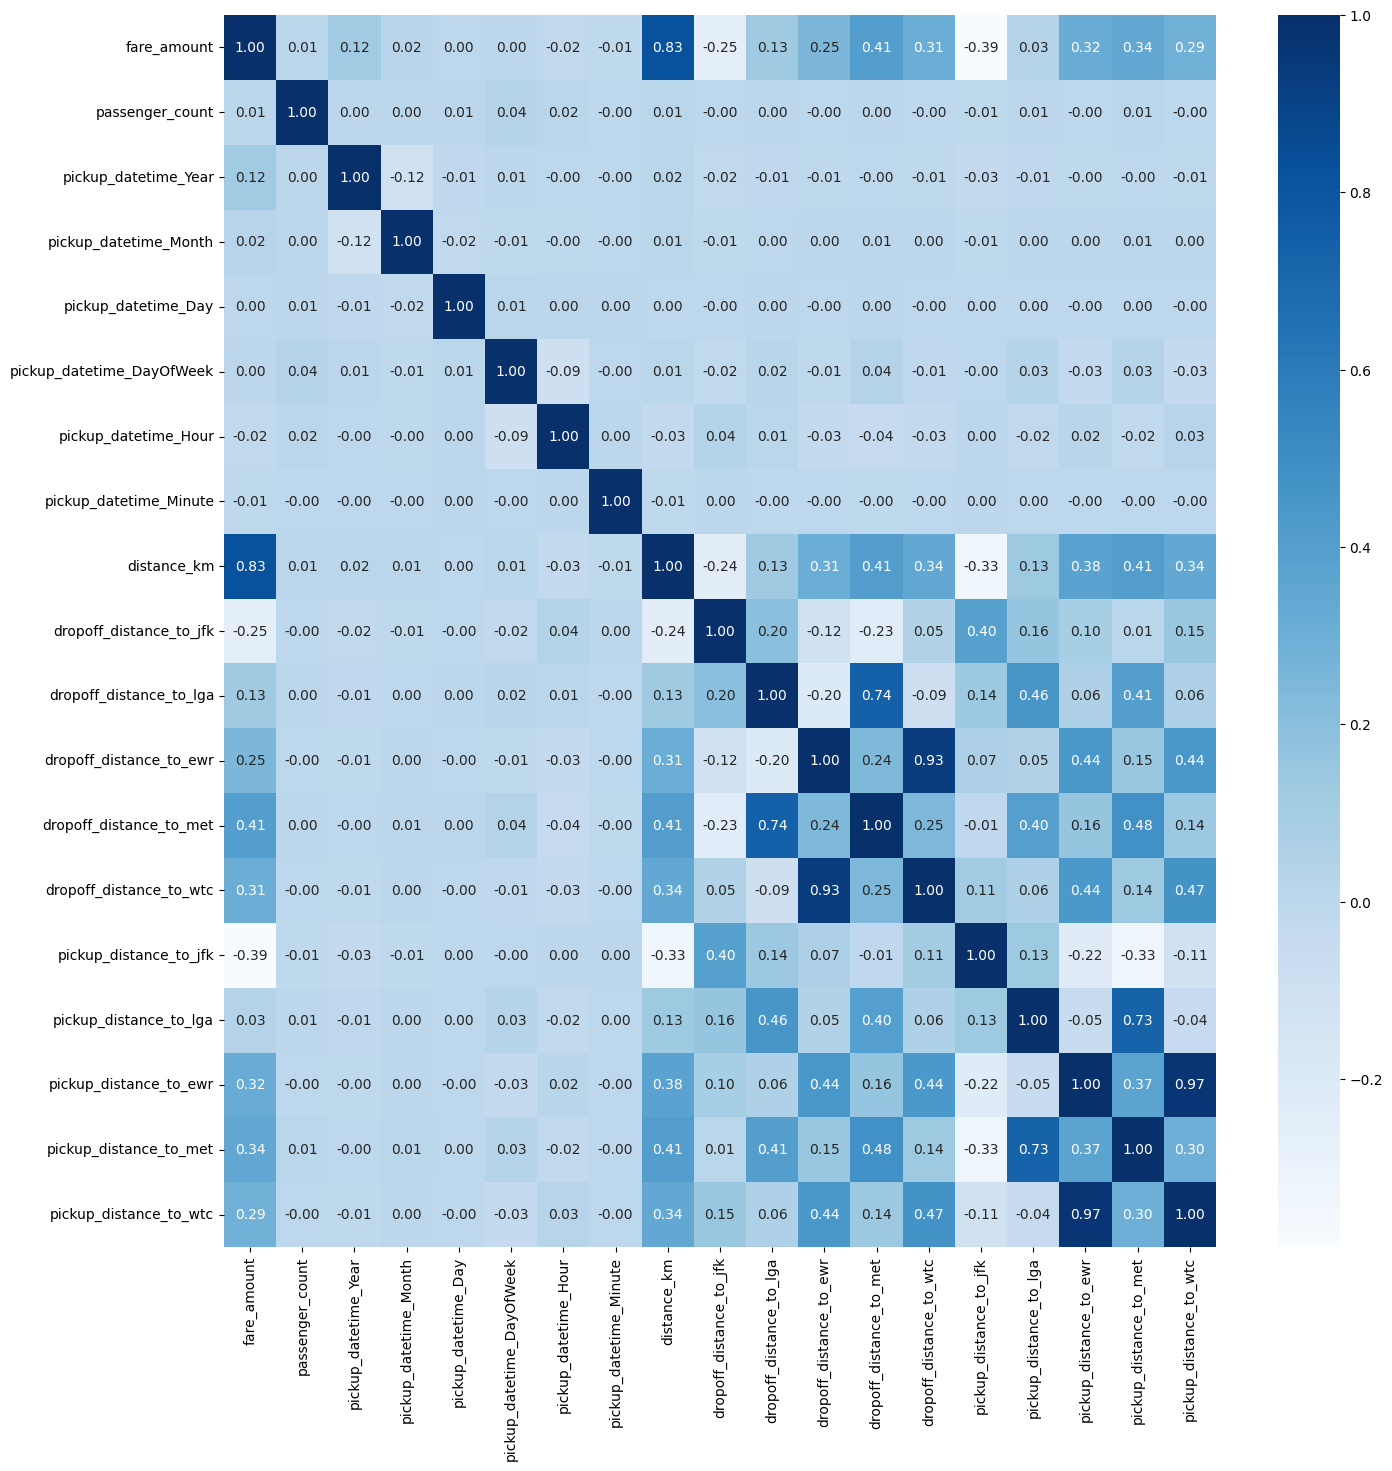

In [ ]:
if sample:
    fig, ax = plt.subplots(figsize=(16, 16))
    sns.heatmap(data=train_taxi_data[vis_cols].corr(), annot=True, cmap="Blues", ax=ax, fmt=".2f")
    plt.show()

high corr between pickup_distance_to_ewr and **pickup_distance_to_wtc**

high corr between **dropoff_distance_to_ewr** and dropoff_distance_to_wtc


### BoxPlot

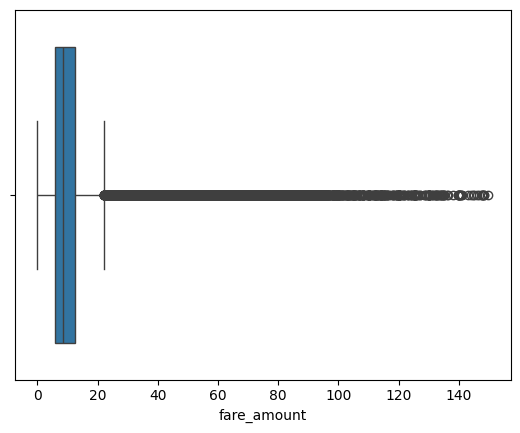

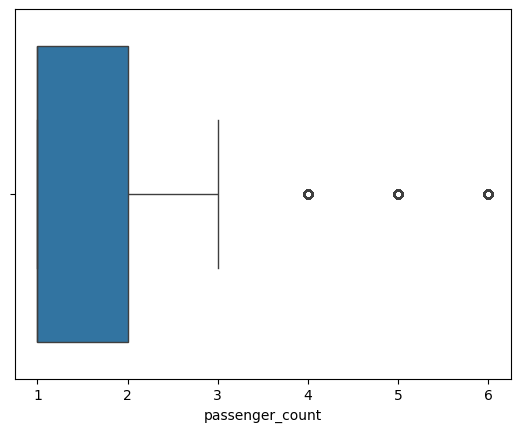

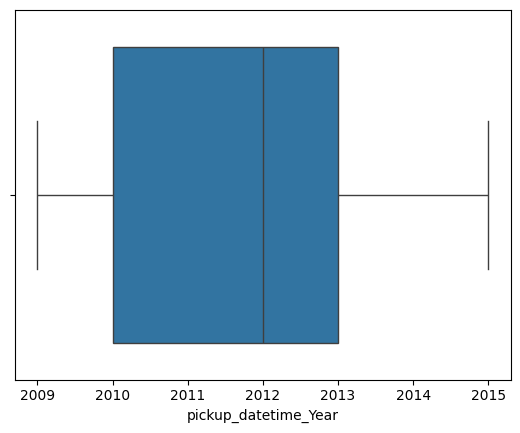

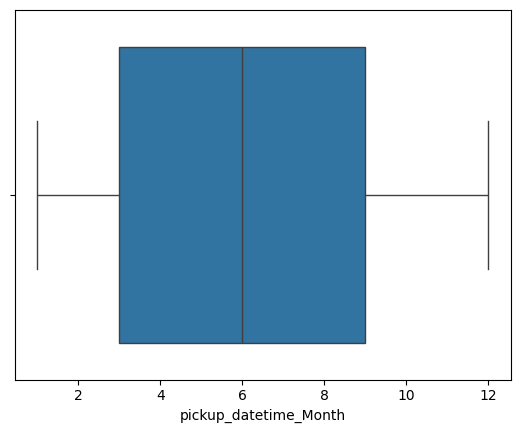

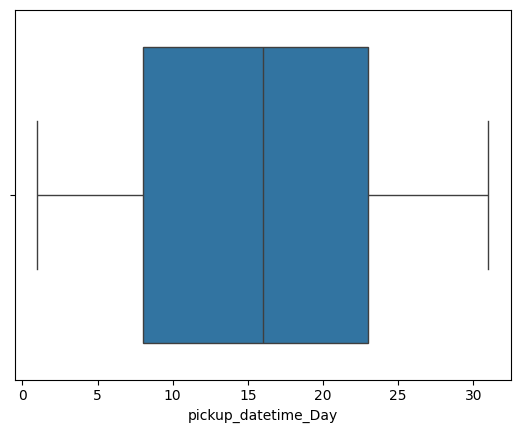

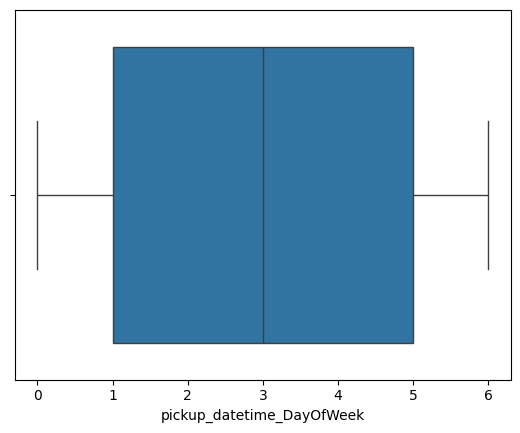

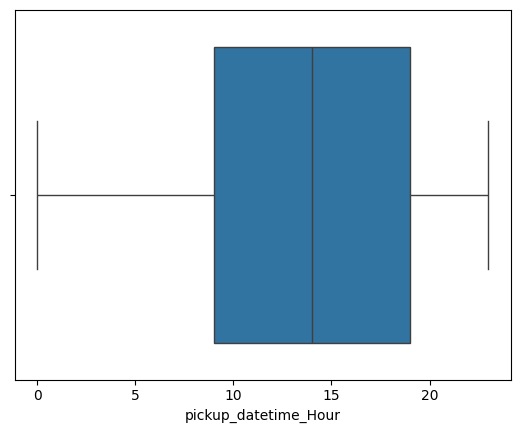

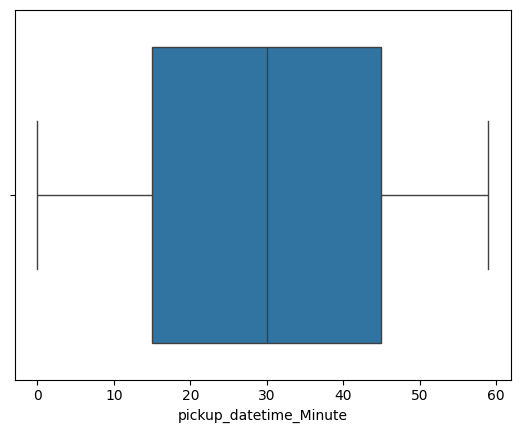

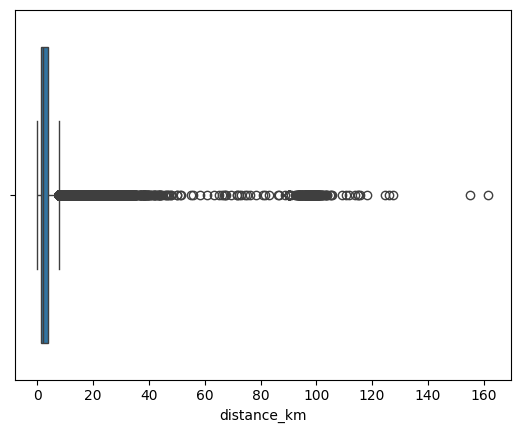

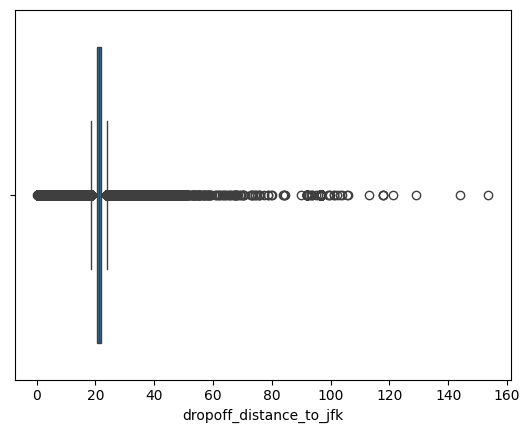

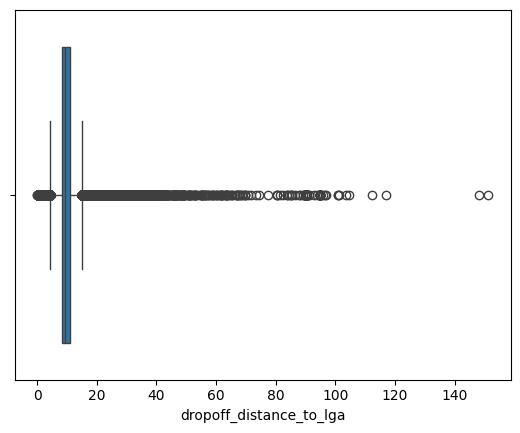

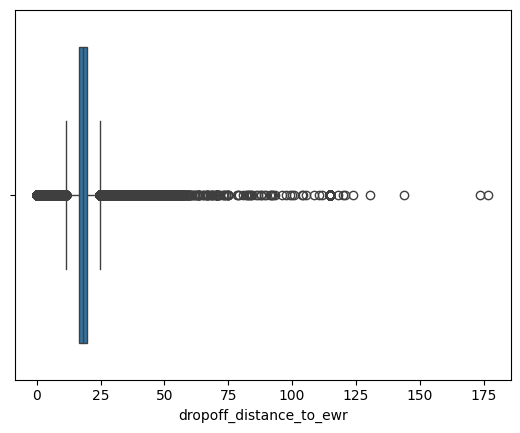

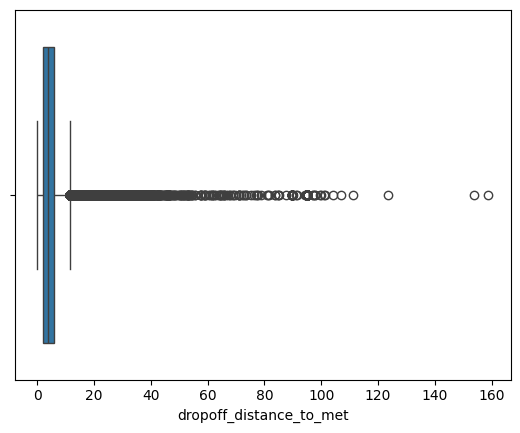

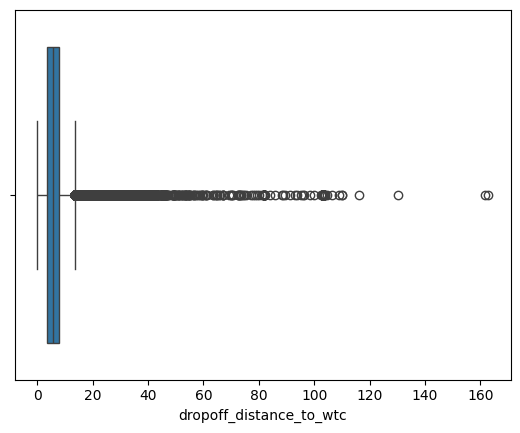

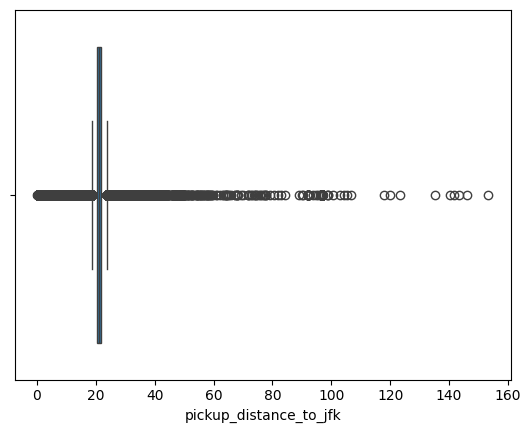

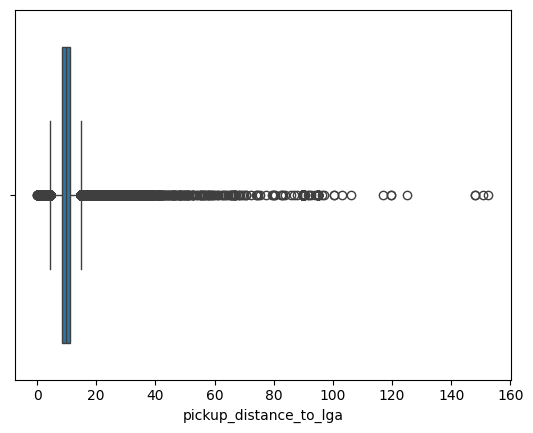

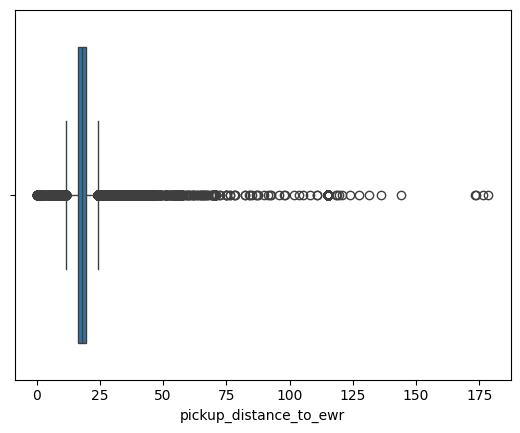

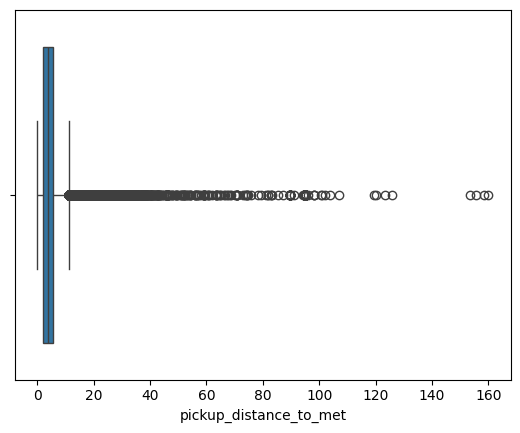

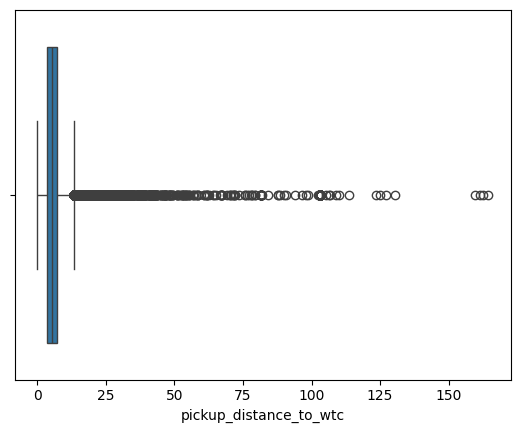

In [ ]:
if sample:
    for col in vis_cols:
      sns.boxplot(data=train_taxi_data, x=col)
      plt.show()

I can't drop these outliers samples because they are in test set

### Histogram

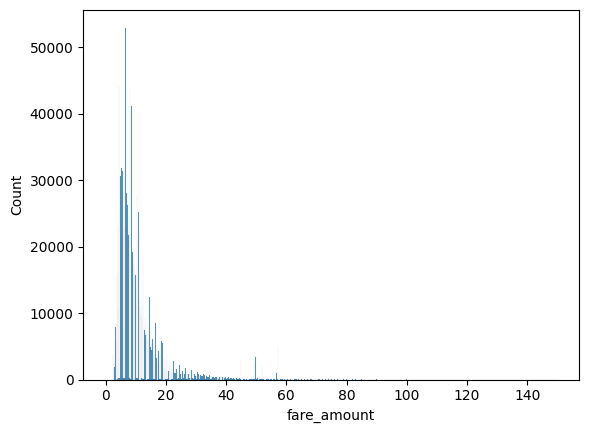

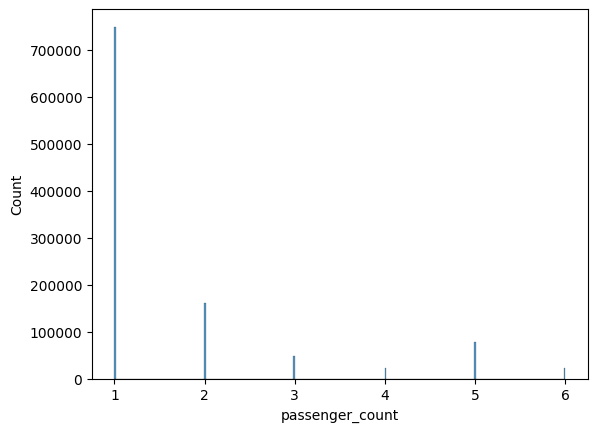

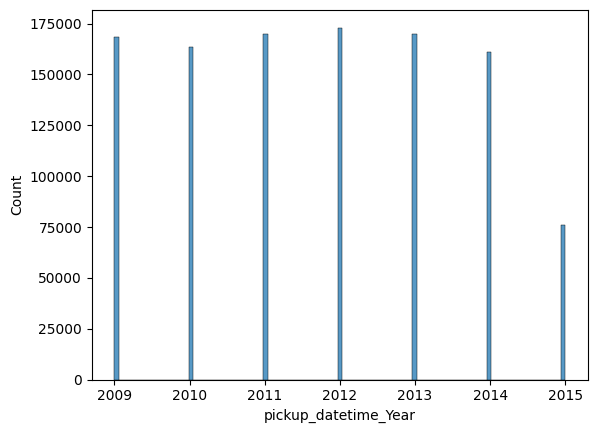

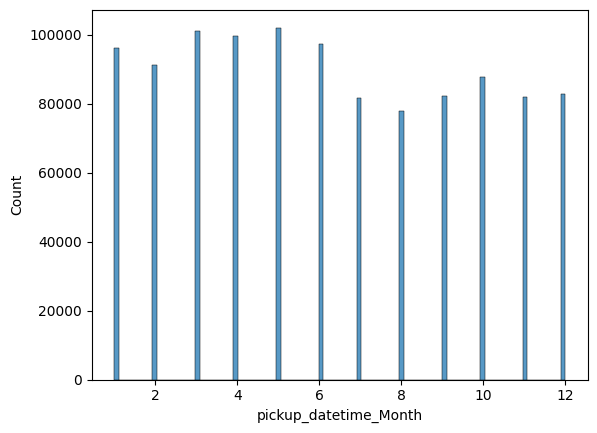

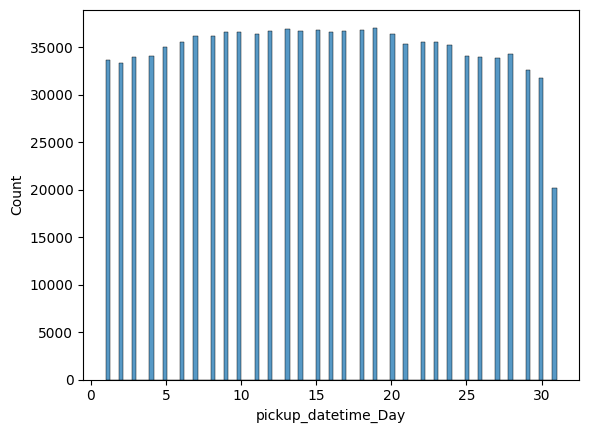

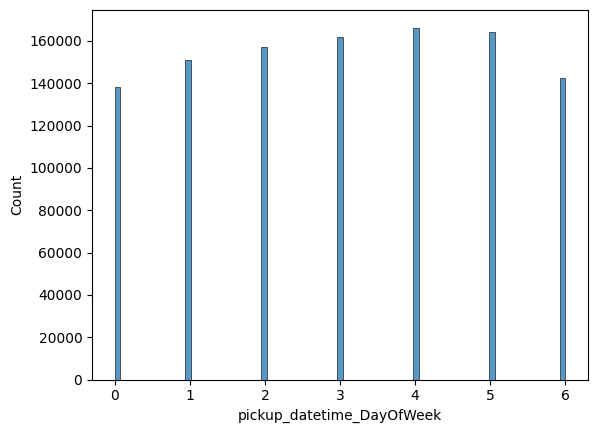

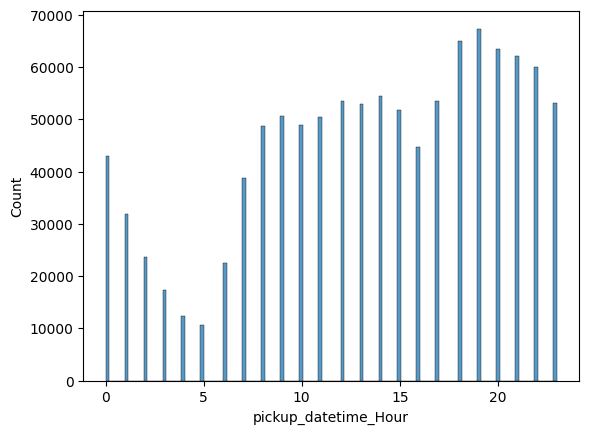

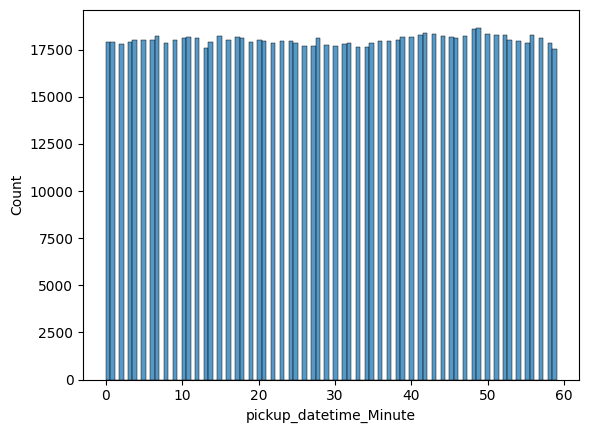

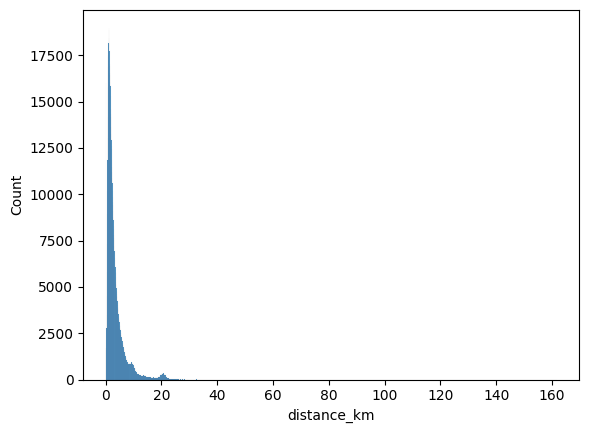

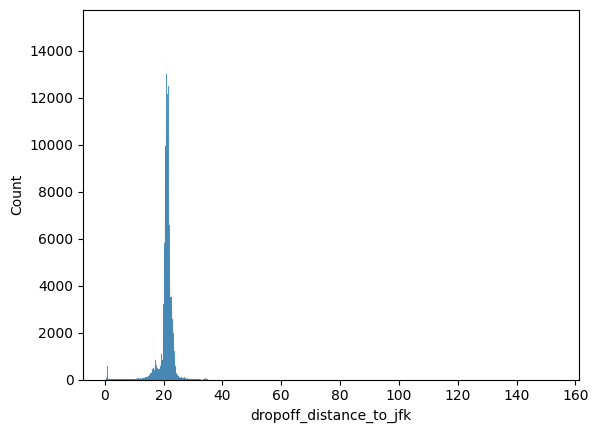

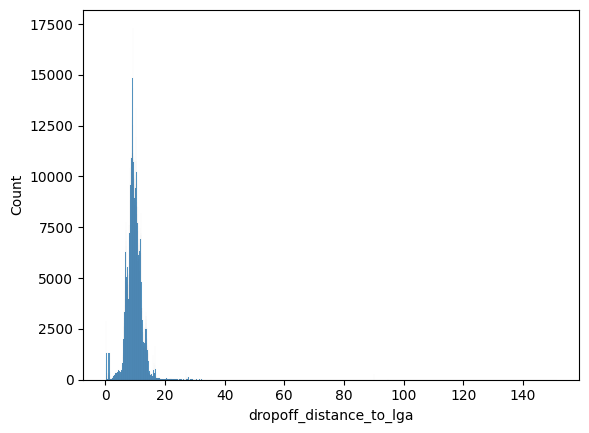

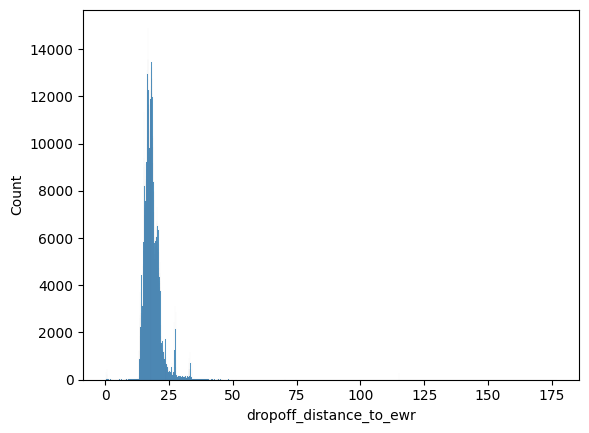

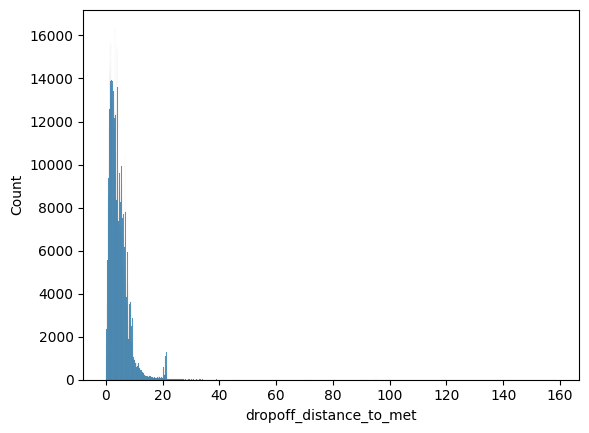

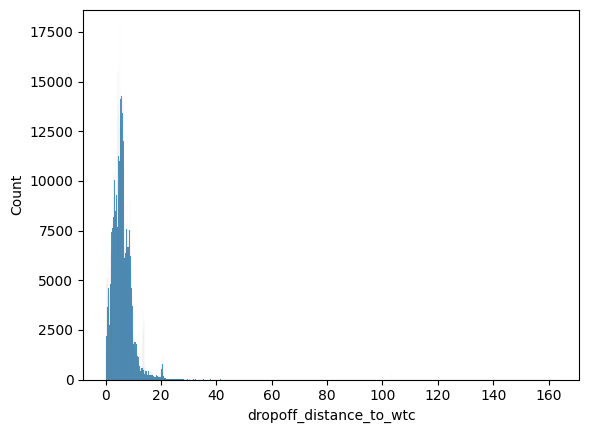

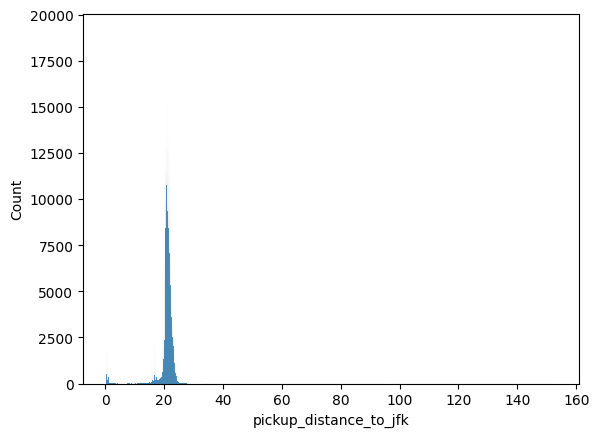

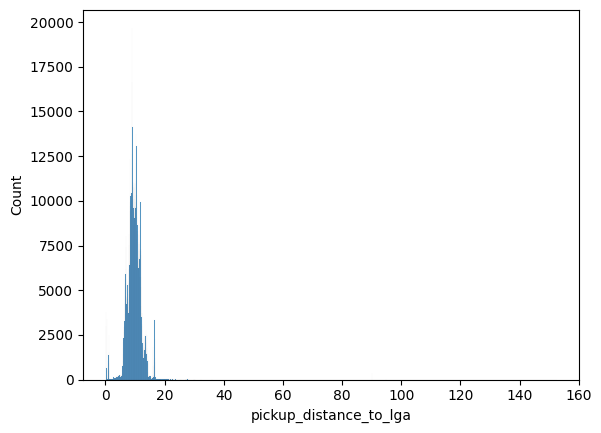

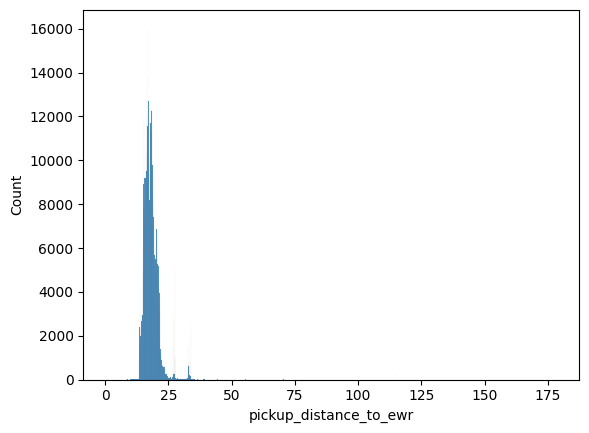

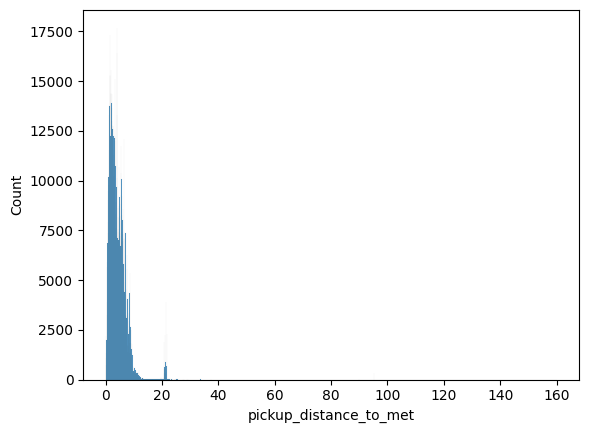

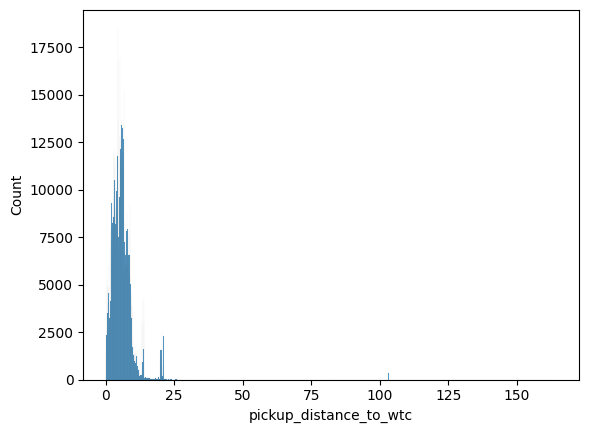

In [ ]:
if sample:
    for col in vis_cols:
      sns.histplot(data=train_taxi_data, x=col)
      plt.show()

Log:
* distance_km
* dropoff_distance_to_ewr(dropped)
* dropoff_distance_to_met
* dropoff_distance_to_wtc
* pickup_distance_to_ewr
* pickup_distance_to_met
* pickup_distance_to_wtc(dropped)



In [ ]:
to_log_cols = ["distance_km", "dropoff_distance_to_met", "dropoff_distance_to_wtc",
                                "pickup_distance_to_ewr", "pickup_distance_to_met"]
log_cols = [col + "_Log" for col in to_log_cols]

In [ ]:
epsilon = 1e-6

for col in to_log_cols:
    train_taxi_data[f"{col}_Log"] = np.log(train_taxi_data[col] + epsilon)
    test_taxi_data[f"{col}_Log"] = np.log(test_taxi_data[col] + epsilon)

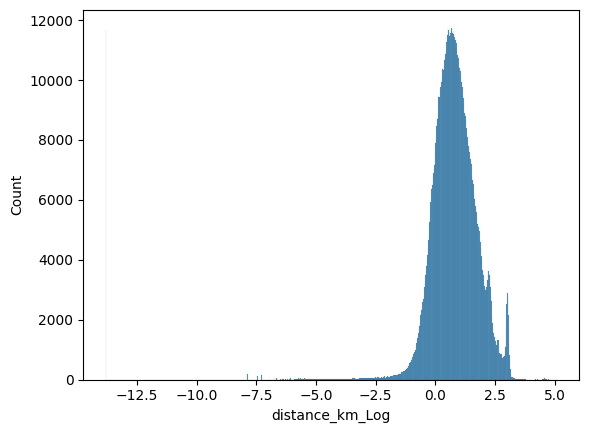

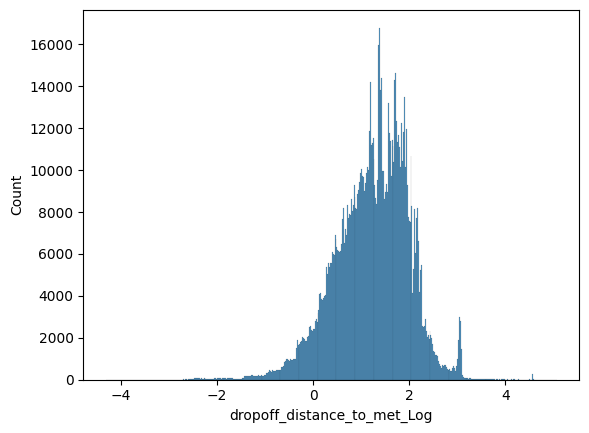

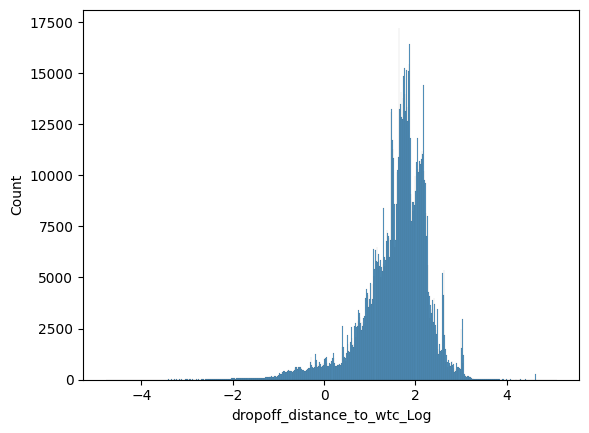

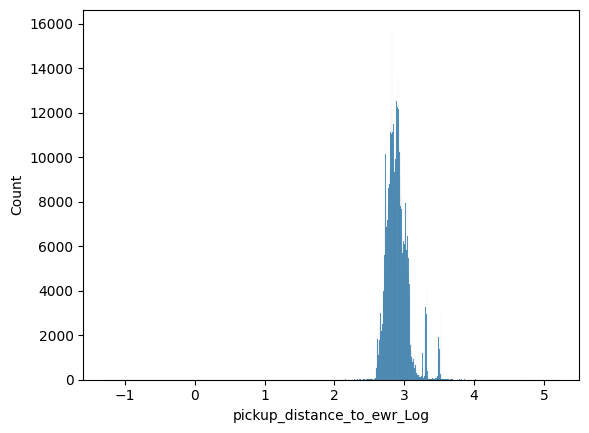

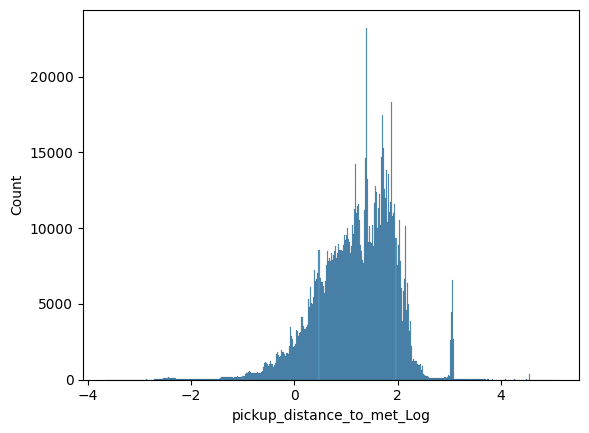

In [ ]:
if sample:
    for col in log_cols:
      sns.histplot(data=train_taxi_data, x=col)
      plt.show()

### Correlation after Log

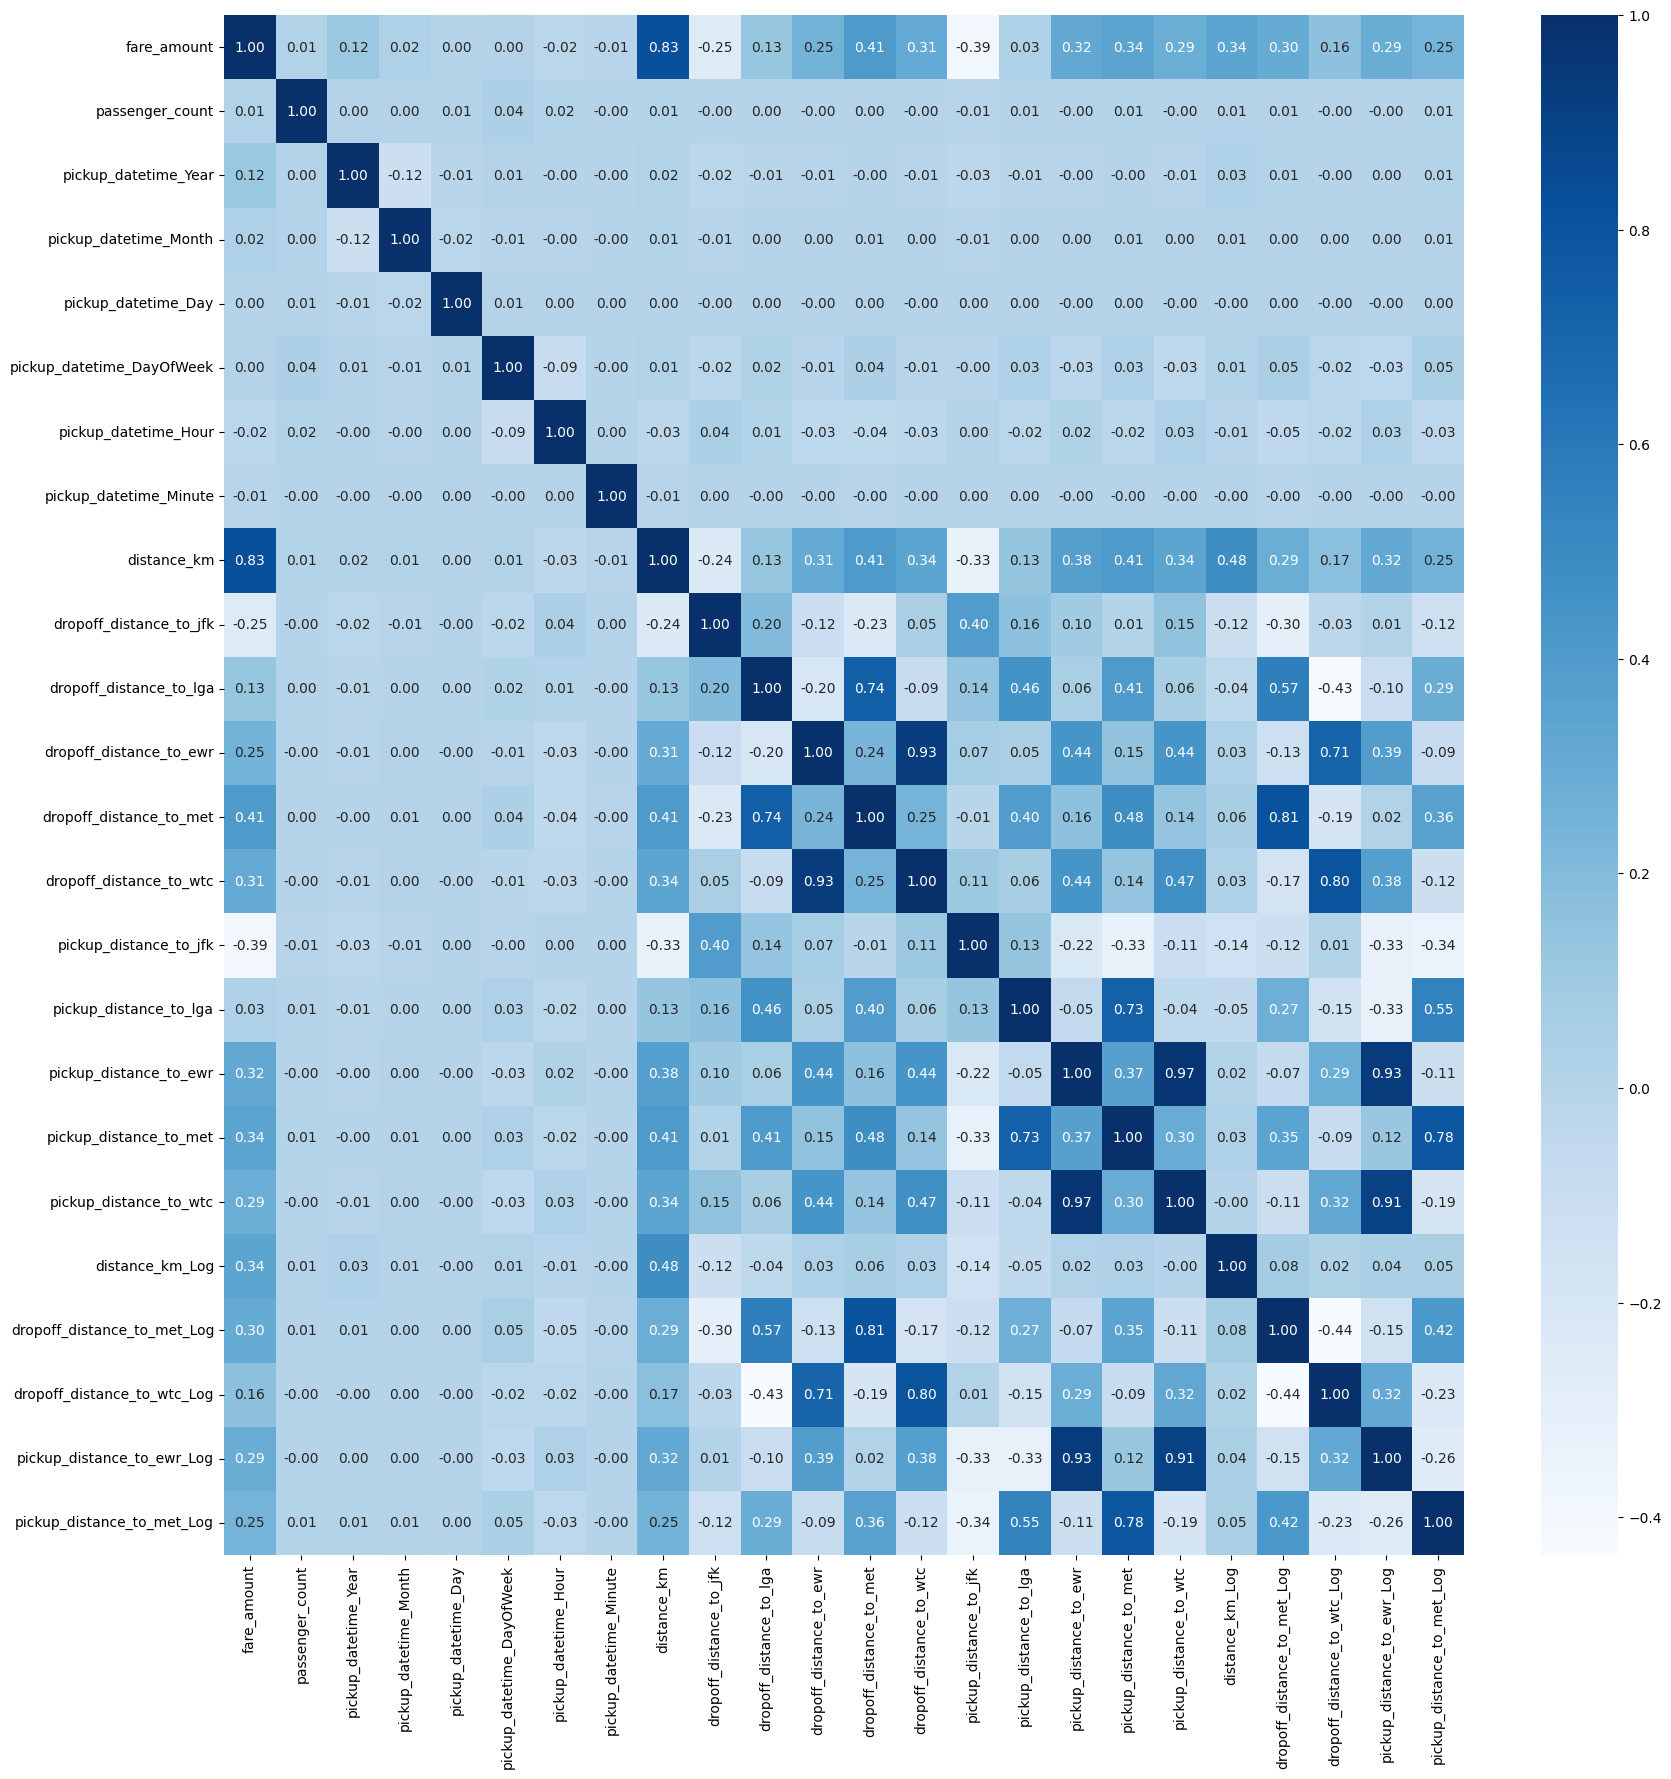

In [ ]:
if sample:
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(data=train_taxi_data[vis_cols + log_cols].corr(), annot=True, cmap="Blues", ax=ax, fmt=".2f")
    plt.show()

to_log columns have a higher correlation with fare_amount

### Summary

Log of:
* distance_km
* dropoff_distance_to_ewr(dropped)
* dropoff_distance_to_met
* dropoff_distance_to_wtc
* pickup_distance_to_ewr
* pickup_distance_to_met
* pickup_distance_to_wtc(dropped)

Original columns have higher correlation with fare_amount

## **12.Prepare data for ML training** **

### Log

* distance_km
* dropoff_distance_to_ewr(dropped)
* dropoff_distance_to_met
* dropoff_distance_to_wtc
* pickup_distance_to_ewr
* pickup_distance_to_met
* pickup_distance_to_wtc(dropped)

Original columns have higher correlation with fare_amount



In [ ]:
to_log_cols = ["distance_km", "dropoff_distance_to_met", "dropoff_distance_to_wtc",
                                "pickup_distance_to_ewr", "pickup_distance_to_met"]
log_cols = [col + "_Log" for col in to_log_cols]

In [ ]:
# epsilon = 1e-6

# for col in to_log_cols:
#     train_taxi_data[f"{col}_Log"] = np.log(train_taxi_data[col] + epsilon).astype(np.float32)
#     test_taxi_data[f"{col}_Log"] = np.log(test_taxi_data[col] + epsilon).astype(np.float32)

In [ ]:
# if train_whole:
#   del train_taxi_data["distance_km"]
#   del train_taxi_data["dropoff_distance_to_met"]
#   del train_taxi_data["dropoff_distance_to_wtc"]
#   del train_taxi_data["pickup_distance_to_ewr"]
#   del train_taxi_data["pickup_distance_to_met"]
#   gc.collect()

### Input & Target columns exploration

In [ ]:
target_cols = ["fare_amount"]

# high corr between pickup_distance_to_ewr and pickup_distance_to_wtc
# high corr between dropoff_distance_to_ewr and dropoff_distance_to_wtc
drop_cols = ["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude",
             "dropoff_latitude", "dropoff_distance_to_ewr", "pickup_distance_to_wtc"]

input_cols = [col for col in train_taxi_data.columns if col not in target_cols + drop_cols]

pickup_landmarks_cols = [f"pickup_distance_to_{name}" for  _, name in landmarks_lonlat]
dropoff_landmarks_cols = [f"dropoff_distance_to_{name}" for  _, name in landmarks_lonlat]

In [ ]:
print(dropoff_landmarks_cols)
print(pickup_landmarks_cols)

['dropoff_distance_to_jfk', 'dropoff_distance_to_lga', 'dropoff_distance_to_ewr', 'dropoff_distance_to_met', 'dropoff_distance_to_wtc']
['pickup_distance_to_jfk', 'pickup_distance_to_lga', 'pickup_distance_to_ewr', 'pickup_distance_to_met', 'pickup_distance_to_wtc']


In [ ]:
print(input_cols)

['passenger_count', 'pickup_datetime_Year', 'pickup_datetime_Month', 'pickup_datetime_Day', 'pickup_datetime_DayOfWeek', 'pickup_datetime_Hour', 'pickup_datetime_Minute', 'distance_km', 'dropoff_distance_to_jfk', 'dropoff_distance_to_lga', 'dropoff_distance_to_met', 'dropoff_distance_to_wtc', 'pickup_distance_to_jfk', 'pickup_distance_to_lga', 'pickup_distance_to_ewr', 'pickup_distance_to_met', 'distance_km_Log', 'dropoff_distance_to_met_Log', 'dropoff_distance_to_wtc_Log', 'pickup_distance_to_ewr_Log', 'pickup_distance_to_met_Log']


In [ ]:
train_taxi_data[input_cols].nunique().to_frame().T

,passenger_count,pickup_datetime_Year,pickup_datetime_Month,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute,distance_km,dropoff_distance_to_jfk,dropoff_distance_to_lga,...,dropoff_distance_to_wtc,pickup_distance_to_jfk,pickup_distance_to_lga,pickup_distance_to_ewr,pickup_distance_to_met,distance_km_Log,dropoff_distance_to_met_Log,dropoff_distance_to_wtc_Log,pickup_distance_to_ewr_Log,pickup_distance_to_met_Log
0,6,7,12,31,7,24,60,1052212,843772,995336,...,1035280,808177,978999,935612,1027489,1052212,1042256,1035280,935612,1027489


No categorical, No binary

In [ ]:
train_taxi_data[input_cols].isna().sum()[lambda x: x > 0]

,0


No nan values

In [ ]:
train_taxi_data[input_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081167 entries, 7389741 to 12723910
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   passenger_count              1081167 non-null  int16  
 1   pickup_datetime_Year         1081167 non-null  int16  
 2   pickup_datetime_Month        1081167 non-null  int8   
 3   pickup_datetime_Day          1081167 non-null  int8   
 4   pickup_datetime_DayOfWeek    1081167 non-null  int8   
 5   pickup_datetime_Hour         1081167 non-null  int8   
 6   pickup_datetime_Minute       1081167 non-null  int8   
 7   distance_km                  1081167 non-null  float32
 8   dropoff_distance_to_jfk      1081167 non-null  float32
 9   dropoff_distance_to_lga      1081167 non-null  float32
 10  dropoff_distance_to_met      1081167 non-null  float32
 11  dropoff_distance_to_wtc      1081167 non-null  float32
 12  pickup_distance_to_jfk       1081167 non

### Downcast Dtype

In [ ]:
float64_cols = train_taxi_data.select_dtypes(include=[np.float64]).columns
int32_cols = train_taxi_data.select_dtypes(include=[np.int32]).columns
to_int8_cols = ["passenger_count", "pickup_datetime_Month", "pickup_datetime_Day",
                "pickup_datetime_DayOfWeek", "pickup_datetime_Hour", "pickup_datetime_Minute"]

In [ ]:
train_taxi_data[float64_cols] = train_taxi_data[float64_cols].astype(np.float32)
train_taxi_data[int32_cols] = train_taxi_data[int32_cols].astype(np.int16)
train_taxi_data[to_int8_cols] = train_taxi_data[to_int8_cols].astype(np.int8)

In [ ]:
train_taxi_data[input_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081167 entries, 7389741 to 12723910
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   passenger_count              1081167 non-null  int8   
 1   pickup_datetime_Year         1081167 non-null  int16  
 2   pickup_datetime_Month        1081167 non-null  int8   
 3   pickup_datetime_Day          1081167 non-null  int8   
 4   pickup_datetime_DayOfWeek    1081167 non-null  int8   
 5   pickup_datetime_Hour         1081167 non-null  int8   
 6   pickup_datetime_Minute       1081167 non-null  int8   
 7   distance_km                  1081167 non-null  float32
 8   dropoff_distance_to_jfk      1081167 non-null  float32
 9   dropoff_distance_to_lga      1081167 non-null  float32
 10  dropoff_distance_to_met      1081167 non-null  float32
 11  dropoff_distance_to_wtc      1081167 non-null  float32
 12  pickup_distance_to_jfk       1081167 non

### Input Types

To use type A and C uncomment Log section

In [ ]:
# # Type A with Log columns andcolumns'to_log columns
# target_cols = ["fare_amount"]

# drop_cols = ["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude",
#              "dropoff_latitude", "dropoff_distance_to_ewr", "pickup_distance_to_wtc"]

# input_cols = [col for col in train_taxi_data.columns if col not in target_cols + drop_cols]

# scalar_cols = input_cols.copy()

In [ ]:
# Best
# Type B without log columns
target_cols = ["fare_amount"]

drop_cols = ["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude",
             "dropoff_latitude", "dropoff_distance_to_ewr", "pickup_distance_to_wtc"] + log_cols

input_cols = [col for col in train_taxi_data.columns if col not in target_cols + drop_cols]

scalar_cols = input_cols.copy()

In [ ]:
# # Type C without to log columns
# target_cols = ["fare_amount"]

# drop_cols = ["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude",
#              "dropoff_latitude", "dropoff_distance_to_ewr", "pickup_distance_to_wtc"] + to_log_cols

# input_cols = [col for col in train_taxi_data.columns if col not in target_cols + drop_cols]

# scalar_cols = input_cols.copy()

In [ ]:
print("Target:", target_cols)
print("Input:", input_cols)

Target: ['fare_amount']
Input: ['passenger_count', 'pickup_datetime_Year', 'pickup_datetime_Month', 'pickup_datetime_Day', 'pickup_datetime_DayOfWeek', 'pickup_datetime_Hour', 'pickup_datetime_Minute', 'distance_km', 'dropoff_distance_to_jfk', 'dropoff_distance_to_lga', 'dropoff_distance_to_met', 'dropoff_distance_to_wtc', 'pickup_distance_to_jfk', 'pickup_distance_to_lga', 'pickup_distance_to_ewr', 'pickup_distance_to_met']


In [ ]:
test_taxi_data[input_cols].head(1)

,passenger_count,pickup_datetime_Year,pickup_datetime_Month,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute,distance_km,dropoff_distance_to_jfk,dropoff_distance_to_lga,dropoff_distance_to_met,dropoff_distance_to_wtc,pickup_distance_to_jfk,pickup_distance_to_lga,pickup_distance_to_ewr,pickup_distance_to_met
0,1,2015,1,27,1,13,8,2.32326,20.588026,9.76666,4.242198,4.221205,21.362957,8.489691,18.859081,1.932137


In [ ]:
train_taxi_data[input_cols].head(1)

,passenger_count,pickup_datetime_Year,pickup_datetime_Month,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute,distance_km,dropoff_distance_to_jfk,dropoff_distance_to_lga,dropoff_distance_to_met,dropoff_distance_to_wtc,pickup_distance_to_jfk,pickup_distance_to_lga,pickup_distance_to_ewr,pickup_distance_to_met
7389741,1,2011,2,28,0,2,7,6.448661,21.502161,5.355861,3.078694,11.220261,21.996214,10.049118,17.221531,3.418135


### Split Train & Val

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_taxi_data[input_cols],
                                                  train_taxi_data[target_cols],
                                                  test_size=0.2,
                                                  random_state=random_seed)

X_test = test_taxi_data.copy()

In [ ]:
if train_whole:
    del train_taxi_data
    gc.collect()

In [ ]:
X_train.shape, y_train.shape

((864933, 16), (864933, 1))

In [ ]:
X_val.shape, y_val.shape

((216234, 16), (216234, 1))

In [ ]:
X_train[scalar_cols].describe()

,passenger_count,pickup_datetime_Year,pickup_datetime_Month,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute,distance_km,dropoff_distance_to_jfk,dropoff_distance_to_lga,dropoff_distance_to_met,dropoff_distance_to_wtc,pickup_distance_to_jfk,pickup_distance_to_lga,pickup_distance_to_ewr,pickup_distance_to_met
count,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000
mean,1.694263,2011.739617,6.268454,15.701928,3.045927,13.497156,29.552601,3.334929,20.917770,9.691819,4.488899,5.964002,20.867981,9.678558,18.357149,4.333263
std,1.309734,1.865014,3.434487,8.688399,1.948602,6.515599,17.329861,3.792544,3.082781,3.039516,3.757239,3.945809,3.337295,3.013582,3.729780,3.755100
min,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.306375,0.112680,0.013430,0.008360,0.202715,0.114454,0.286303,0.025876
25%,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.254191,20.534636,8.326428,2.138651,3.587110,20.568737,8.385839,16.365059,2.091779
50%,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,2.153772,21.186989,9.530023,3.714688,5.494664,21.194706,9.620378,17.820602,3.651009
75%,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,3.908834,21.912401,10.993954,5.895156,7.650216,21.890108,11.025121,19.466335,5.716659
max,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,161.686081,153.620514,151.332016,158.844635,162.895798,153.340454,152.541489,178.544754,160.028458


### Normalization
If you use tree based model you can skip normalization

In [ ]:
scalar = MinMaxScaler()

scalar.fit(X_train[scalar_cols]) # exclude pickup_datetime

MinMaxScaler()

In [ ]:
X_train[scalar_cols] = scalar.transform(X_train[scalar_cols])
X_val[scalar_cols] = scalar.transform(X_val[scalar_cols])
X_test[scalar_cols] = scalar.transform(X_test[scalar_cols])

In [ ]:
if train_whole:
    del scalar
    gc.collect()

In [ ]:
X_train[scalar_cols].describe()

,passenger_count,pickup_datetime_Year,pickup_datetime_Month,pickup_datetime_Day,pickup_datetime_DayOfWeek,pickup_datetime_Hour,pickup_datetime_Minute,distance_km,dropoff_distance_to_jfk,dropoff_distance_to_lga,dropoff_distance_to_met,dropoff_distance_to_wtc,pickup_distance_to_jfk,pickup_distance_to_lga,pickup_distance_to_ewr,pickup_distance_to_met
count,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000,864933.000000
mean,0.138853,0.456603,0.478950,0.490064,0.507654,0.586833,0.500892,0.020626,0.134439,0.063346,0.028178,0.036563,0.134946,0.062745,0.101374,0.026921
std,0.262270,0.310918,0.312105,0.289617,0.324920,0.283351,0.293754,0.023458,0.020106,0.020098,0.023657,0.024224,0.021796,0.019768,0.020923,0.023472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.166656,0.181818,0.233333,0.166667,0.391304,0.254237,0.007757,0.131940,0.054317,0.013380,0.021971,0.132992,0.054265,0.090199,0.012912
50%,0.000000,0.500000,0.454545,0.500000,0.500000,0.608696,0.508475,0.013321,0.136195,0.062276,0.023303,0.033682,0.137079,0.062364,0.098364,0.022657
75%,0.200000,0.666656,0.727273,0.733333,0.833333,0.826087,0.762712,0.024175,0.140927,0.071957,0.037031,0.046915,0.141620,0.071580,0.107597,0.035567
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Load Processed Data**

In [ ]:
# if train_whole:
#     import gdown

#     urls = [
#             ('https://drive.google.com/file/d/1aw1xZFh3FZ__BDLeu4iVvcs-zONivxGr/view?usp=sharing', 'X_train.parquet'),
#             ('https://drive.google.com/file/d/1Xz89qL2r59hbO38BYPwdLxPR8fPS21W1/view?usp=sharing', 'y_train.parquet'),
#             ('https://drive.google.com/file/d/1GbEGEf7vOfcwANy3vEp0XoFLIqOfFC1d/view?usp=sharing', 'X_val.parquet'),
#             ('https://drive.google.com/file/d/1M-Rn-ThT3DVY8xzu8Jald1qJj1Ap7fGc/view?usp=sharing', 'y_val.parquet'),
#             ('https://drive.google.com/file/d/1oj-FE6rRP-APymy3fWPqJmM5la8wbuhL/view?usp=sharing', 'X_test.parquet'),
#             ]

#     for url, name in urls:
#         # Convert to the direct download link
#         file_id = url.split('/d/')[1].split('/')[0]
#         direct_url = f'https://drive.google.com/uc?id={file_id}'

#         # Download
#         gdown.download(direct_url, name, quiet=False)

In [ ]:
# %%time
# if train_whole:
#     X_train = pd.read_parquet("./X_train.parquet")
#     y_train = pd.read_parquet("./y_train.parquet")
#     X_val = pd.read_parquet("./X_val.parquet")
#     y_val = pd.read_parquet("./y_val.parquet")
#     X_test = pd.read_parquet("./X_test.parquet")

# """
# CPU times: user 14.4 s, sys: 8.49 s, total: 22.9 s
# Wall time: 21.4 s
# """

## **Train Functions** **

In [ ]:
def predict_save_test(model, name):
    test_pred = model.predict(X_test[input_cols])

    submission_df = X_test[["key"]].copy()

    submission_df["fare_amount"] = test_pred

    submission_df.to_csv(f"submission_{name}.csv", index=None)

    try:
      submission_df.to_csv(f"/content/drive/MyDrive/submission_{name}.csv", index=None)
    except:
      pass

In [ ]:
def try_model(model):
    # Fit the model
    model.fit(X_train, y_train.iloc[:, 0])

    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Compute RMSE
    train_rmse = root_mean_squared_error(y_train.iloc[:, 0], train_preds)
    val_rmse = root_mean_squared_error(y_val.iloc[:, 0], val_preds)

    # Compute MAE
    train_mae = mean_absolute_error(y_train.iloc[:, 0], train_preds)
    val_mae = mean_absolute_error(y_val.iloc[:, 0], val_preds)

    print(f"Model Parameters: {[(key, value) for key, value in model.get_params().items() if value]}")
    print("RMSE train, val:", train_rmse, val_rmse)
    print("MAE train, val:", train_mae, val_mae)

## **13.Train & Evaluate Different Models**



We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Ridge
- KNN(Failed)
- Decision Tree
- Random Forests(Failed)
- Gradient Boosting

In [ ]:
# %%time
# model = LinearRegression()
# try_model(model)
# predict_save_test(model, "lr_raw")

"""
Model Parameters: [('copy_X', True), ('fit_intercept', True)]
RMSE train, val: 5.7926554679870605 5.796473979949951
MAE train, val: 3.1012613773345947 3.1023972034454346
CPU times: user 927 ms, sys: 38.6 ms, total: 966 ms
Wall time: 761 ms
"""

"\nModel Parameters: [('copy_X', True), ('fit_intercept', True)]\nRMSE train, val: 5.7926554679870605 5.796473979949951\nMAE train, val: 3.1012613773345947 3.1023972034454346\nCPU times: user 927 ms, sys: 38.6 ms, total: 966 ms\nWall time: 761 ms\n"

In [ ]:
# %%time
# model = Ridge(random_state=random_seed)
# try_model(model)
# predict_save_test(model, "ridge_raw")

"""
Model Parameters: [('alpha', 1.0), ('copy_X', True), ('fit_intercept', True), ('random_state', 42), ('solver', 'auto'), ('tol', 0.0001)]
RMSE train, val: 4.5105299949646 4.665225505828857
MAE train, val: 2.3668150901794434 2.384657621383667
CPU times: user 611 ms, sys: 25.8 ms, total: 636 ms
Wall time: 586 ms
"""

"\nModel Parameters: [('alpha', 1.0), ('copy_X', True), ('fit_intercept', True), ('random_state', 42), ('solver', 'auto'), ('tol', 0.0001)]\nRMSE train, val: 4.5105299949646 4.665225505828857\nMAE train, val: 2.3668150901794434 2.384657621383667\nCPU times: user 611 ms, sys: 25.8 ms, total: 636 ms\nWall time: 586 ms\n"

In [ ]:
# %%time
# model = DecisionTreeRegressor(random_state=random_seed)
# try_model(model)
# predict_save_test(model, "dt_raw")

"""
Model Parameters: [('criterion', 'squared_error'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('random_state', 42), ('splitter', 'best')]
RMSE train, val: 0.0 5.093766183934762
MAE train, val: 0.0 2.394786951646936
CPU times: user 1min 17s, sys: 265 ms, total: 1min 17s
Wall time: 1min 21s
"""

"\nModel Parameters: [('criterion', 'squared_error'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('random_state', 42), ('splitter', 'best')]\nRMSE train, val: 0.0 5.093766183934762\nMAE train, val: 0.0 2.394786951646936\nCPU times: user 1min 17s, sys: 265 ms, total: 1min 17s\nWall time: 1min 21s\n"

In [ ]:
# %%time
# model = XGBRegressor(n_jobs=-1, random_state=random_seed, device="gpu")
# try_model(model)
# predict_save_test(model, "xgb_raw")

"""
Type A
Model Parameters: [('objective', 'reg:squarederror'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.191084384918213 3.5462682247161865
MAE train, val: 1.5748748779296875 1.6391260623931885
CPU times: user 1min 2s, sys: 285 ms, total: 1min 3s
Wall time: 36.5 s
"""

"\nType A\nModel Parameters: [('objective', 'reg:squarederror'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]\nRMSE train, val: 3.191084384918213 3.5462682247161865\nMAE train, val: 1.5748748779296875 1.6391260623931885\nCPU times: user 1min 2s, sys: 285 ms, total: 1min 3s\nWall time: 36.5 s\n"

## **Analyze Best Model**

In [ ]:
%%time
plot_model = XGBRegressor(n_jobs=-1, random_state=random_seed, device="gpu")
try_model(plot_model)

"""
Type A ✅
Model Parameters: [('objective', 'reg:squarederror'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.191084384918213 3.5462682247161865
MAE train, val: 1.5748748779296875 1.6391260623931885
CPU times: user 24.6 s, sys: 52.6 ms, total: 24.7 s
Wall time: 14.6 s


Type B ✅
Model Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.192680597305298 3.554469108581543
MAE train, val: 1.5741688013076782 1.6379667520523071
CPU times: user 19.7 s, sys: 42.5 ms, total: 19.7 s
Wall time: 10.6 s

Type B 30%
Model Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.6688923835754395 3.658414125442505
MAE train, val: 1.62137770652771 1.6225801706314087
CPU times: user 54.6 s, sys: 1.96 s, total: 56.6 s
Wall time: 36.9 s

Type C ✅
Model Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.1969716548919678 3.5503549575805664
MAE train, val: 1.5775450468063354 1.6418085098266602
CPU times: user 21 s, sys: 59.6 ms, total: 21 s
Wall time: 12.1 s

Type C 30%
Model Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.6637980937957764 3.653820037841797
MAE train, val: 1.618445634841919 1.6199278831481934
CPU times: user 53.9 s, sys: 1.62 s, total: 55.5 s
Wall time: 38.8 s

Type D
Model Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.268098831176758 3.6133384704589844
MAE train, val: 1.6439822912216187 1.706200122833252
CPU times: user 27.5 s, sys: 94.8 ms, total: 27.6 s
Wall time: 26 s

Type E
Model Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.3981311321258545 3.7091660499572754
MAE train, val: 1.69106924533844 1.7485781908035278
CPU times: user 26.7 s, sys: 88.7 ms, total: 26.8 s
Wall time: 20.6 s

Type F
Model Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.4724652767181396 3.7812302112579346
MAE train, val: 1.7236409187316895 1.7798806428909302
CPU times: user 20.9 s, sys: 78.6 ms, total: 21 s
Wall time: 13.5 s
"""

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:46:30] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:46:30] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Model Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]
RMSE train, val: 3.192680597305298 3.554469108581543
MAE train, val: 1.5741688013076782 1.6379667520523071
CPU times: user 22.8 s, sys: 51 ms, total: 22.8 s
Wall time: 13.3 s


"\nType A ✅\nModel Parameters: [('objective', 'reg:squarederror'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]\nRMSE train, val: 3.191084384918213 3.5462682247161865\nMAE train, val: 1.5748748779296875 1.6391260623931885\nCPU times: user 24.6 s, sys: 52.6 ms, total: 24.7 s\nWall time: 14.6 s\n\n\nType B ✅\nModel Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]\nRMSE train, val: 3.192680597305298 3.554469108581543\nMAE train, val: 1.5741688013076782 1.6379667520523071\nCPU times: user 19.7 s, sys: 42.5 ms, total: 19.7 s\nWall time: 10.6 s\n\nType B 30%\nModel Parameters: [('objective', 'reg:squarederror'), ('device', 'gpu'), ('missing', nan), ('n_jobs', -1), ('random_state', 42)]\nRMSE train, val: 3.6688923835754395 3.658414125442505\nMAE train, val: 1.62137770652771 1.6225801706314087\nCPU times: user 54.6 s, sys: 1.96 s, total: 56.6 s\nWall time: 36.9 s\n\nType C ✅\nModel Parameters: [('objective', '

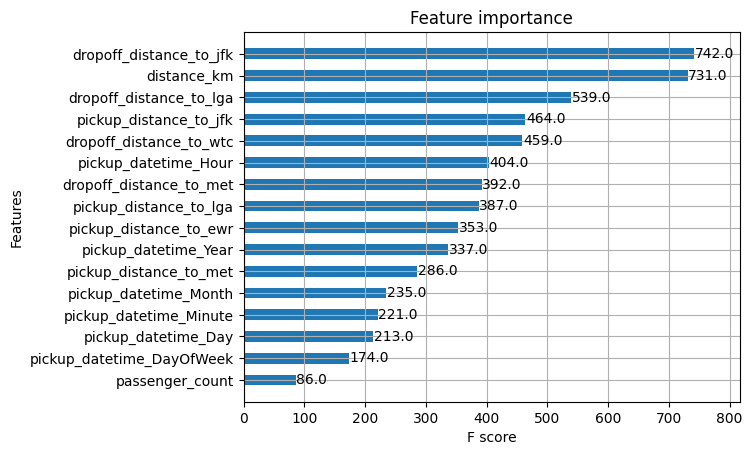

In [ ]:
plot_importance(plot_model, height=0.5)
plt.show()

Importance Type C:

distance_km_log, landmarks distances, Hour, Year, Month, Minutes, Day, DayOfWeek, passenger_count

In [ ]:
# # If you have a Booster object:
# booster = plot_model.get_booster()

# # Dump model in text format and parse
# model_dump = booster.get_dump()

# def get_tree_depth(tree):
#     depth = 0
#     for line in tree.splitlines():
#         if ':' in line:
#             level = line.count('\t')
#             depth = max(depth, level)
#     return depth

# tree_depths = [get_tree_depth(tree) for tree in model_dump]

# print(f"Maximum tree depth: {max(tree_depths)}")

# # Maximum tree depth: 6

## **14.Tune hyperparameters** **

### **Bayesian Optimization**

Look for best hyperparameters

#### Search

In [ ]:
%%capture
!pip install optuna

In [ ]:
import optuna
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 6, 11),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 512, 1024),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    model = XGBRegressor(
        **params,
        device="gpu",
        random_state=random_seed
    )

    model.fit(
        X_train, y_train.iloc[:, 0],
        eval_set=[(X_val, y_val.iloc[:, 0])],
        verbose=False
    )

    preds = model.predict(X_val)
    return root_mean_squared_error(y_val.iloc[:, 0], preds)  # Minimize RMSE

In [ ]:
# study = optuna.create_study(direction='minimize')  # Minimize RMSE
# study.optimize(objective, n_trials=250)

# print("Best RMSE:", study.best_value)
# print("Best parameters:", study.best_params)

best_params_list = """[I 2025-06-10 01:17:57,880] Trial 51 finished with value: 3.4455080032348633 and parameters: {'max_depth': 10, 'learning_rate': 0.03295689421419053, 'n_estimators': 690, 'subsample': 0.8744618084061554, 'colsample_bytree': 0.7883964168376899, 'gamma': 3.1302144501635594, 'min_child_weight': 6, 'reg_alpha': 0.2844085329762259, 'reg_lambda': 0.7302911386726469}. Best is trial 51 with value: 3.4455080032348633.
[I 2025-06-10 01:15:20,404] Trial 38 finished with value: 3.449536085128784 and parameters: {'max_depth': 10, 'learning_rate': 0.040829918754098374, 'n_estimators': 696, 'subsample': 0.8555249280055243, 'colsample_bytree': 0.8341799083554919, 'gamma': 4.343440581849562, 'min_child_weight': 5, 'reg_alpha': 0.7092102675855, 'reg_lambda': 0.5845911694768545}. Best is trial 38 with value: 3.449536085128784.
[I 2025-06-10 01:13:49,076] Trial 32 finished with value: 3.451315402984619 and parameters: {'max_depth': 11, 'learning_rate': 0.0327047954129403, 'n_estimators': 811, 'subsample': 0.7640510939184075, 'colsample_bytree': 0.7499935447778514, 'gamma': 2.9698545355716064, 'min_child_weight': 7, 'reg_alpha': 0.9391294018995648, 'reg_lambda': 0.48184318726946274}. Best is trial 32 with value: 3.451315402984619.
[I 2025-06-10 01:11:16,633] Trial 23 finished with value: 3.4541919231414795 and parameters: {'max_depth': 10, 'learning_rate': 0.026001822371177843, 'n_estimators': 800, 'subsample': 0.7921597192239884, 'colsample_bytree': 0.7672929407070985, 'gamma': 1.277591120136154, 'min_child_weight': 9, 'reg_alpha': 0.5439591069748637, 'reg_lambda': 0.12518479257954246}. Best is trial 23 with value: 3.4541919231414795.
[I 2025-06-10 01:07:23,119] Trial 11 finished with value: 3.4546847343444824 and parameters: {'max_depth': 11, 'learning_rate': 0.02456962061677117, 'n_estimators': 871, 'subsample': 0.7492367672956195, 'colsample_bytree': 0.7336760046253329, 'gamma': 0.5470701306311232, 'min_child_weight': 7, 'reg_alpha': 0.9949128695104018, 'reg_lambda': 0.013198634174529045}. Best is trial 11 with value: 3.4546847343444824.
[I 2025-06-10 01:07:00,689] Trial 10 finished with value: 3.46443772315979 and parameters: {'max_depth': 11, 'learning_rate': 0.01260710870033305, 'n_estimators': 837, 'subsample': 0.7589598552196368, 'colsample_bytree': 0.7322858549566911, 'gamma': 0.3778651514915543, 'min_child_weight': 7, 'reg_alpha': 0.990149620311428, 'reg_lambda': 0.07098337261364152}. Best is trial 10 with value: 3.46443772315979.
[I 2025-06-10 01:05:26,286] Trial 2 finished with value: 3.467402935028076 and parameters: {'max_depth': 9, 'learning_rate': 0.025760894371254596, 'n_estimators': 850, 'subsample': 0.6742266350572547, 'colsample_bytree': 0.8115857570566665, 'gamma': 4.840161007923851, 'min_child_weight': 5, 'reg_alpha': 0.7101082742231143, 'reg_lambda': 0.010186410249855449}. Best is trial 2 with value: 3.467402935028076.
[I 2025-06-10 01:05:13,480] Trial 1 finished with value: 3.5077874660491943 and parameters: {'max_depth': 9, 'learning_rate': 0.13351039398882786, 'n_estimators': 1024, 'subsample': 0.9655272242370179, 'colsample_bytree': 0.6588596129864152, 'gamma': 3.3290242251954973, 'min_child_weight': 3, 'reg_alpha': 0.2842653941981187, 'reg_lambda': 0.4355204638153988}. Best is trial 1 with value: 3.5077874660491943."""

In [ ]:
def best_parameters(text):
  best_lines = ""
  lines = text.split("\n")[1:]
  line = len(lines) - 1

  while line != 0:
      best_line_idx = int(lines[line].split()[-4])
      best_lines += lines[best_line_idx] + "\n"
      line = best_line_idx - 1

  return best_lines

#### Check

In [ ]:
# for line in best_params_list.split("\n"):
#     start = line.index("{")
#     end = line.index("}")
#     parameters_dict = line[start: end+1]
#     params = eval(parameters_dict)

#     print(line[:37])
#     model = XGBRegressor(**params, device="gpu", random_state=random_seed, n_jobs=-1)
#     try_model(model)
#     print("=" * 50)

"""
[I 2025-06-10 01:17:57,880] Trial 51
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.541585683822632 3.454928159713745
MAE train, val: 1.3252075910568237 1.5450835227966309
==================================================
[I 2025-06-10 01:11:16,633] Trial 23
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7672929407070985), ('device', 'gpu'), ('gamma', 1.277591120136154), ('learning_rate', 0.026001822371177843), ('max_depth', 10), ('min_child_weight', 9), ('missing', nan), ('n_estimators', 800), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.5439591069748637), ('reg_lambda', 0.12518479257954246), ('subsample', 0.7921597192239884)]
RMSE train, val: 2.644987106323242 3.460465669631958
MAE train, val: 1.3596341609954834 1.5523784160614014
"""

"\n[I 2025-06-10 01:17:57,880] Trial 51\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]\nRMSE train, val: 2.541585683822632 3.454928159713745\nMAE train, val: 1.3252075910568237 1.5450835227966309\n==================================================\n[I 2025-06-10 01:11:16,633] Trial 23\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7672929407070985), ('device', 'gpu'), ('gamma', 1.277591120136154), ('learning_rate', 0.026001822371177843), ('max_depth', 10), ('min_child_weight', 9), ('missing', nan), ('n_estimators', 800), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.5439591069748637), 

#### Use on large samples **

In [ ]:
# # connect to save prediction result on your google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
%%time
if train_whole:
    params = {'max_depth': 10, 'learning_rate': 0.03295689421419053, 'n_estimators': 690, 'subsample': 0.8744618084061554, 'colsample_bytree': 0.7883964168376899, 'gamma': 3.1302144501635594, 'min_child_weight': 6, 'reg_alpha': 0.2844085329762259, 'reg_lambda': 0.7302911386726469}

    model = XGBRegressor(**params, device="gpu", random_state=random_seed, n_jobs=-1)
    try_model(model)
    predict_save_test(model, "xgb_optune_51_44_33m")

"""
Type C 60%
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.362156629562378 3.539259672164917
MAE train, val: 1.4738786220550537 1.4965620040893555
CPU times: user 4min 26s, sys: 4.36 s, total: 4min 30s
Wall time: 4min

Type C 80%
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.399414539337158 3.551562547683716
MAE train, val: 1.4780316352844238 1.4946428537368774
CPU times: user 5min 54s, sys: 5.98 s, total: 6min
Wall time: 5min 14s
"""

CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 35 µs


"\nType C 60%\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]\nRMSE train, val: 3.362156629562378 3.539259672164917\nMAE train, val: 1.4738786220550537 1.4965620040893555\nCPU times: user 4min 26s, sys: 4.36 s, total: 4min 30s\nWall time: 4min\n\nType C 80%\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.730291138672

#### Use on small samples

In [ ]:
# %%time
# params = {'max_depth': 9, 'learning_rate': 0.03, 'n_estimators': 4096, 'subsample': 0.8744618084061554, 'colsample_bytree': 0.7883964168376899, 'gamma': 3.1302144501635594, 'min_child_weight': 6, 'reg_alpha': 0.2844085329762259, 'reg_lambda': 0.7302911386726469}

# model = XGBRegressor(**params, device="gpu", random_state=random_seed, n_jobs=-1)
# try_model(model)
# predict_save_test(model, "xgb_optune_mod_2")

"""
Type C 30%
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.05), ('max_depth', 9), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 1024), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.2329156398773193 3.5208592414855957
MAE train, val: 1.4502464532852173 1.4910885095596313
CPU times: user 2min 32s, sys: 2.11 s, total: 2min 34s
Wall time: 2min 18s

Type C 30% mod 1
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 2048), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.995514392852783 3.5074522495269775
MAE train, val: 1.383591890335083 1.4625827074050903
CPU times: user 4min 42s, sys: 3 s, total: 4min 45s
Wall time: 4min 34s

Type C 30% mod 2
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03), ('max_depth', 9), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 4096), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.980390787124634 3.5137500762939453
MAE train, val: 1.3835152387619019 1.4644180536270142
CPU times: user 7min 14s, sys: 3.47 s, total: 7min 18s
Wall time: 7min 4s

Type C 30% mod 3
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 4096), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.752013921737671 3.511887550354004
MAE train, val: 1.3185440301895142 1.4475772380828857
CPU times: user 8min 15s, sys: 3.97 s, total: 8min 19s
Wall time: 8min 4s

Type B 30% mod 2
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03), ('max_depth', 9), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 4096), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.9812779426574707 3.5140695571899414
MAE train, val: 1.382794737815857 1.4637246131896973
CPU times: user 7min 2s, sys: 3.92 s, total: 7min 6s
Wall time: 6min 53s

Type A 30% mod 2
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03), ('max_depth', 9), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 4096), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.9685938358306885 3.5168395042419434
MAE train, val: 1.382974624633789 1.465193748474121
CPU times: user 8min 8s, sys: 4.05 s, total: 8min 12s
Wall time: 7min 46s

Type B 60% mod 2
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03), ('max_depth', 9), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 4096), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.1096317768096924 3.5175392627716064
MAE train, val: 1.4029028415679932 1.4552574157714844
CPU times: user 13min 28s, sys: 6.65 s, total: 13min 34s
Wall time: 12min 59s

Type B 80% mod 2
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03), ('max_depth', 9), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 4096), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.166311264038086 3.5217456817626953
MAE train, val: 1.40885329246521 1.450014591217041
CPU times: user 17min 47s, sys: 9.3 s, total: 17min 56s
Wall time: 17min 10s

Type B 60% mod 2 max_depth=10, lr=0.032
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.032), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 4096), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.9328315258026123 3.511708974838257
MAE train, val: 1.3546271324157715 1.4376286268234253
CPU times: user 15min 7s, sys: 7.18 s, total: 15min 14s
Wall time: 14min 41s


Type B 60% mod 2 n_estimators=8192
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03), ('max_depth', 9), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 8192), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.9176747798919678 3.5192220211029053
MAE train, val: 1.3545866012573242 1.4404488801956177
CPU times: user 24min 20s, sys: 9.24 s, total: 24min 29s
Wall time: 23min 56s
"""

"\nType C 30%\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.05), ('max_depth', 9), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 1024), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]\nRMSE train, val: 3.2329156398773193 3.5208592414855957\nMAE train, val: 1.4502464532852173 1.4910885095596313\nCPU times: user 2min 32s, sys: 2.11 s, total: 2min 34s\nWall time: 2min 18s\n\nType C 30% mod 1\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 2048), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.73029113867264

In [ ]:
# # 51
# %%time
# params = {'max_depth': 10, 'learning_rate': 0.03295689421419053, 'n_estimators': 690, 'subsample': 0.8744618084061554, 'colsample_bytree': 0.7883964168376899, 'gamma': 3.1302144501635594, 'min_child_weight': 6, 'reg_alpha': 0.2844085329762259, 'reg_lambda': 0.7302911386726469}

# model = XGBRegressor(**params, device="gpu", random_state=random_seed, n_jobs=-1)
# try_model(model)
# predict_save_test(model, "xgb_optune_51")

"""
Type C
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 2.541585683822632 3.454928159713745
MAE train, val: 1.3252075910568237 1.5450835227966309

Type C 30%
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.3034133911132812 3.5262112617492676
MAE train, val: 1.4690877199172974 1.5025821924209595
CPU times: user 2min 13s, sys: 1.87 s, total: 2min 15s
Wall time: 2min 1s

Type B 30%
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.297740936279297 3.525484323501587
MAE train, val: 1.468847393989563 1.502846360206604
CPU times: user 2min 20s, sys: 2.2 s, total: 2min 22s
Wall time: 2min 2s

Type A 30%
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.2933149337768555 3.5261945724487305
MAE train, val: 1.4686827659606934 1.5030426979064941
CPU times: user 2min 51s, sys: 2.33 s, total: 2min 53s
Wall time: 2min 26s

Type B 60%
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]
RMSE train, val: 3.3629536628723145 3.541577100753784
MAE train, val: 1.4734951257705688 1.496198296546936
CPU times: user 4min 24s, sys: 4.13 s, total: 4min 28s
Wall time: 3min 51s
"""

"\nType C\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]\nRMSE train, val: 2.541585683822632 3.454928159713745\nMAE train, val: 1.3252075910568237 1.5450835227966309\n\nType C 30%\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7883964168376899), ('device', 'gpu'), ('gamma', 3.1302144501635594), ('learning_rate', 0.03295689421419053), ('max_depth', 10), ('min_child_weight', 6), ('missing', nan), ('n_estimators', 690), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.2844085329762259), ('reg_lambda', 0.7302911386726469), ('subsample', 0.8744618084061554)]\nRMSE train, val: 3.303413391113281

In [ ]:
## 23
# %%time
# params = {'max_depth': 10, 'learning_rate': 0.026001822371177843, 'n_estimators': 800, 'subsample': 0.7921597192239884, 'colsample_bytree': 0.7672929407070985, 'gamma': 1.277591120136154, 'min_child_weight': 9, 'reg_alpha': 0.5439591069748637, 'reg_lambda': 0.12518479257954246}

# model = XGBRegressor(**params, device="gpu", random_state=random_seed, n_jobs=-1)
# try_model(model)
# predict_save_test(model, "xgb_optune_23")

"""
Type C
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7672929407070985), ('device', 'gpu'), ('gamma', 1.277591120136154), ('learning_rate', 0.026001822371177843), ('max_depth', 10), ('min_child_weight', 9), ('missing', nan), ('n_estimators', 800), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.5439591069748637), ('reg_lambda', 0.12518479257954246), ('subsample', 0.7921597192239884)]
RMSE train, val: 2.644987106323242 3.460465669631958
MAE train, val: 1.3596341609954834 1.5523784160614014

Type C 30%
Model Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7672929407070985), ('device', 'gpu'), ('gamma', 1.277591120136154), ('learning_rate', 0.026001822371177843), ('max_depth', 10), ('min_child_weight', 9), ('missing', nan), ('n_estimators', 800), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.5439591069748637), ('reg_lambda', 0.12518479257954246), ('subsample', 0.7921597192239884)]
RMSE train, val: 3.337057113647461 3.529667615890503
MAE train, val: 1.4806936979293823 1.5101655721664429
CPU times: user 2min 31s, sys: 2.06 s, total: 2min 33s
Wall time: 2min 20s
"""

"\nType C\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7672929407070985), ('device', 'gpu'), ('gamma', 1.277591120136154), ('learning_rate', 0.026001822371177843), ('max_depth', 10), ('min_child_weight', 9), ('missing', nan), ('n_estimators', 800), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.5439591069748637), ('reg_lambda', 0.12518479257954246), ('subsample', 0.7921597192239884)]\nRMSE train, val: 2.644987106323242 3.460465669631958\nMAE train, val: 1.3596341609954834 1.5523784160614014\n\nType C 30%\nModel Parameters: [('objective', 'reg:squarederror'), ('colsample_bytree', 0.7672929407070985), ('device', 'gpu'), ('gamma', 1.277591120136154), ('learning_rate', 0.026001822371177843), ('max_depth', 10), ('min_child_weight', 9), ('missing', nan), ('n_estimators', 800), ('n_jobs', -1), ('random_state', 42), ('reg_alpha', 0.5439591069748637), ('reg_lambda', 0.12518479257954246), ('subsample', 0.7921597192239884)]\nRMSE train, val: 3.3370571136474

## **Document & Publish**


- Add explanations using Markdown
- Clean up the code & create functions
- Write a blog post and embed

Follow this guide: https://www.youtube.com/watch?v=NK6UYg3-Bxs

## **References**

* [NYC Weather Processing](https://colab.research.google.com/drive/1d_3rpCSrGTMAbpgMyV_odCybf-POL3nT?usp=sharing)
* Dataset: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview
* Visualize Dataset: https://www.kaggle.com/code/jiridobes/visualization-weather-lgbm-2-90609#Intro
* Missing semester (Shell scripting): https://missing.csail.mit.edu/
* Opendatsets library: https://github.com/JovianML/opendatasets
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* GeoPy: https://geopy.readthedocs.io/en/stable/#module-geopy.distance
* Blog post by Allen Kong: https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24
* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com
* Experiment tracking spreadsheet: https://bit.ly/mltrackingsheet
* Pandas datetime components: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components
* Haversine distance: https://en.wikipedia.org/wiki/Haversine_formula
* Haversine distance with Numpy: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
* RAPIDS (parent project for cudf and cuml): https://rapids.ai/
* Data Science blog post from scratch: https://www.youtube.com/watch?v=NK6UYg3-Bxs
* Examples of Machine Learning Projects:
    * Walmart Store Sales: https://jovian.ai/anushree-k/final-walmart-simple-rf-gbm
    * Used Car Price Prediction: https://jovian.ai/kara-mounir/used-cars-prices
    * Lithology Prediction: https://jovian.ai/ramysaleem/ml-project-machine-predicting-lithologies
    * Ad Demand Prediction: https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj

